
Training LSTM model...
Loaded existing model for LSTM from best_model_LSTM.pt
[LSTM] Epoch 100/800, Training Loss: 0.000324, Validation Loss: 0.016355
Early stopping triggered
[LSTM] Early stopping at epoch 151

Training GRU model...
Loaded existing model for GRU from best_model_GRU.pt


/tmp/ipykernel_997547/1661235294.py:280: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path, map_location=device))


[GRU] Epoch 100/800, Training Loss: 0.000208, Validation Loss: 0.003266
Early stopping triggered
[GRU] Early stopping at epoch 157

Training RNN model...
Loaded existing model for RNN from best_model_RNN.pt


/tmp/ipykernel_997547/1661235294.py:280: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path, map_location=device))


[RNN] Epoch 100/800, Training Loss: 0.000260, Validation Loss: 0.003434
Early stopping triggered
[RNN] Early stopping at epoch 151

Training CNN model...
Loaded existing model for CNN from best_model_CNN.pt


/tmp/ipykernel_997547/1661235294.py:280: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path, map_location=device))


[CNN] Epoch 100/800, Training Loss: 0.000147, Validation Loss: 0.000996
Early stopping triggered
[CNN] Early stopping at epoch 155

Training EnhancedLSTM model...
Loaded existing model for EnhancedLSTM from best_model_EnhancedLSTM.pt


/tmp/ipykernel_997547/1661235294.py:280: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path, map_location=device))


[EnhancedLSTM] Epoch 100/800, Training Loss: 0.016006, Validation Loss: 0.003684
Early stopping triggered
[EnhancedLSTM] Early stopping at epoch 192


/tmp/ipykernel_997547/1661235294.py:280: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path, map_location=device))


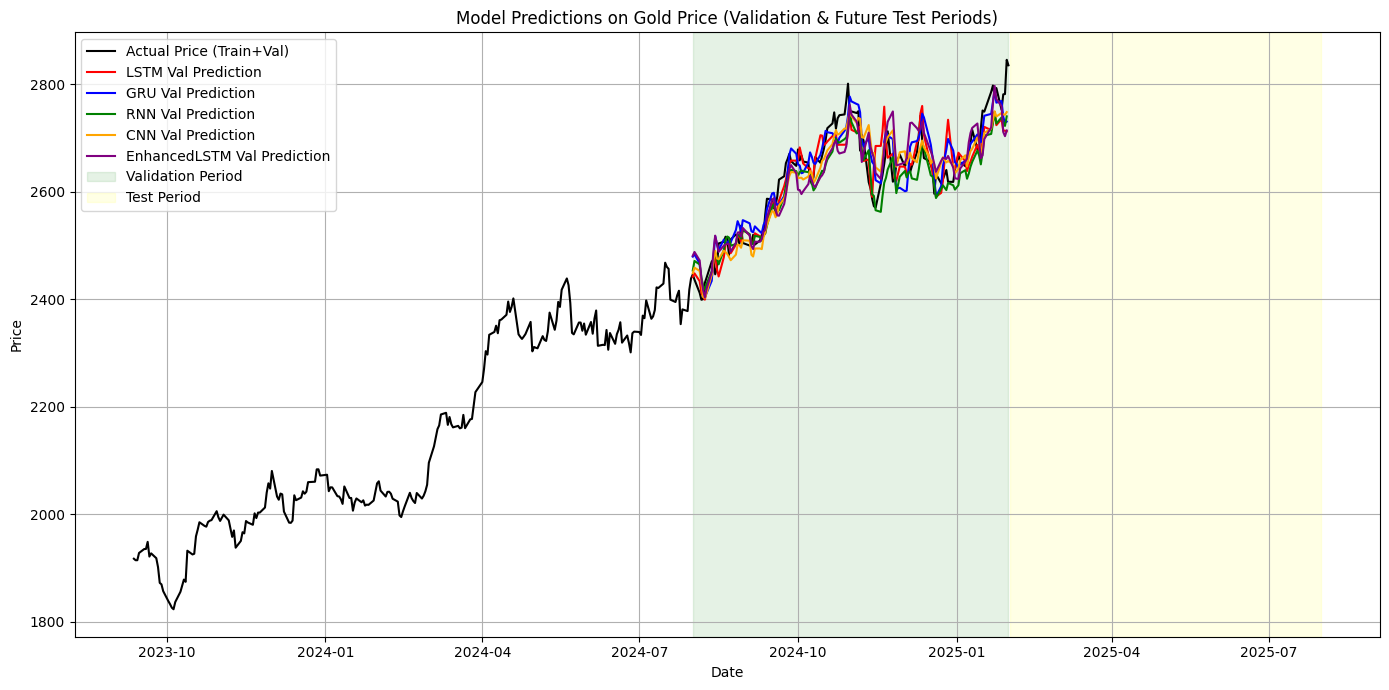

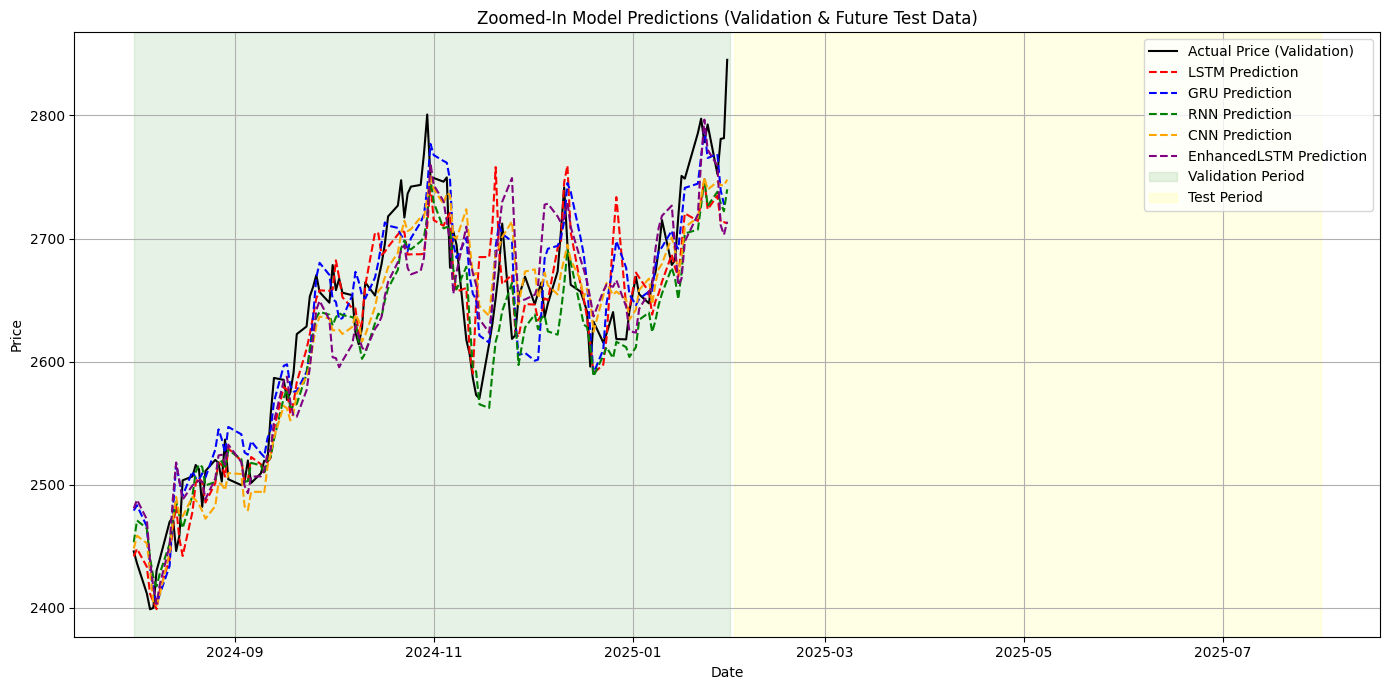

In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F  # for activation functions
from torch.utils.data import DataLoader, TensorDataset
import os
import random
import warnings
import matplotlib.dates as mdates

# ---------------------------
# Set random seeds for reproducibility
# ---------------------------
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)

# ---------------------------
# Load and prepare data
# ---------------------------
df = pd.read_csv('Gold Futures Historical Data_1Yr.csv')
df.drop(['Vol.', 'Change %'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

# Transform columns to numerical format
num_cols = df.columns.drop(['Date'])
df[num_cols] = df[num_cols].replace({',': ''}, regex=True)
df[num_cols] = df[num_cols].astype('float64')

# Check for duplicates and nulls
assert df.duplicated().sum() == 0, "Duplicate rows found!"
assert df.isnull().sum().sum() == 0, "Missing values found!"

# ---------------------------
# Feature selection and scaling
# ---------------------------
features = ['Price', 'Open', 'High', 'Low']
data = df[features].values

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# ---------------------------
# Create sequences using a sliding window
# ---------------------------
window_width = 30  # window size

X, y, dates = [], [], []
for i in range(window_width, len(data_scaled)):
    X.append(data_scaled[i - window_width:i])
    y.append(data_scaled[i, 0])  # target is 'Price'
    dates.append(df['Date'].iloc[i])
X = np.array(X)
y = np.array(y)
dates = np.array(dates)

assert len(dates) == len(y), "Mismatch between dates and target values!"

# ---------------------------
# Split data into training, validation, and test sets
# ---------------------------
# Training: dates before 2024-08-01  
# Validation: 2024-08-01 to 2025-01-31  
# Testing (future prediction): 2025-02-01 to 2025-07-31
train_mask = dates < pd.to_datetime('2024-08-01')
val_mask = (dates >= pd.to_datetime('2024-08-01')) & (dates < pd.to_datetime('2025-01-31'))
test_mask = (dates >= pd.to_datetime('2025-02-01')) & (dates <= pd.to_datetime('2025-07-31'))

X_train, y_train = X[train_mask], y[train_mask]
X_val, y_val = X[val_mask], y[val_mask]
X_test, y_test = X[test_mask], y[test_mask]  # Note: This will be empty if no rows fall in the future period

train_dates = dates[train_mask]
val_dates = dates[val_mask]
test_dates = dates[test_mask]  # may be an empty array

# ---------------------------
# Convert to PyTorch tensors and create datasets/loaders
# ---------------------------
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float().unsqueeze(1)
X_val_tensor = torch.from_numpy(X_val).float()
y_val_tensor = torch.from_numpy(y_val).float().unsqueeze(1)
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float().unsqueeze(1)  # Not used for evaluation if empty

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 32  # Adjust as needed
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ---------------------------
# Define the Model and Helper Classes/Functions
# ---------------------------
class BaseModel(nn.Module):
    def __init__(self, model_type='LSTM'):
        super(BaseModel, self).__init__()
        self.model_type = model_type
        if model_type == 'LSTM':
            self.rnn = nn.LSTM(
                input_size=len(features),
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                dropout=0.1,
            )
            self.fc = nn.Linear(128, 1)
        elif model_type == 'GRU':
            self.rnn = nn.GRU(
                input_size=len(features),
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                dropout=0.1,
            )
            self.fc = nn.Linear(128, 1)
        elif model_type == 'RNN':
            self.rnn = nn.RNN(
                input_size=len(features),
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                nonlinearity='relu',
                dropout=0.1,
            )
            self.fc = nn.Linear(128, 1)
        elif model_type == 'CNN':
            self.conv1 = nn.Conv1d(in_channels=len(features), out_channels=64, kernel_size=3)
            self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3)
            # Compute output length after two conv layers
            conv_output_length = window_width - 2 * (3 - 1)
            self.fc = nn.Linear(128 * conv_output_length, 1)
        elif model_type == 'EnhancedLSTM':
            self.rnn = nn.LSTM(
                input_size=len(features),
                hidden_size=128,
                num_layers=3,
                batch_first=True,
                dropout=0.2,
            )
            self.dropout = nn.Dropout(0.2)
            self.bn = nn.BatchNorm1d(128)
            self.fc = nn.Linear(128, 1)
        else:
            raise ValueError("Invalid model_type. Choose from 'LSTM', 'GRU', 'RNN', 'CNN', or 'EnhancedLSTM'.")

    def forward(self, x):
        if self.model_type == 'CNN':
            # For CNN, change shape to (batch, channels, seq_length)
            x = x.permute(0, 2, 1)
            x = F.relu(self.conv1(x))
            x = F.relu(self.conv2(x))
            x = x.view(x.size(0), -1)
            out = self.fc(x)
        elif self.model_type == 'EnhancedLSTM':
            out, _ = self.rnn(x)
            out = out[:, -1, :]
            out = self.bn(out)
            out = self.dropout(out)
            out = self.fc(out)
        else:
            out, _ = self.rnn(x)
            out = out[:, -1, :]
            out = self.fc(out)
        return out

class EarlyStopping:
    def __init__(self, patience=150, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
            
    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                print("Early stopping triggered")
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

def inverse_transform(y_scaled):
    """
    Inverse transform the scaled 'Price' values back to the original scale.
    Only the first column (Price) is used.
    """
    y_scaled = np.array(y_scaled).reshape(-1, 1)
    zeros = np.zeros((y_scaled.shape[0], len(features) - 1))
    y_combined = np.hstack((y_scaled, zeros))
    y_inv = scaler.inverse_transform(y_combined)
    return y_inv[:, 0]

# ---------------------------
# Training and Prediction Function
# ---------------------------
def train_and_evaluate(model_name):
    # Initialize model
    model = BaseModel(model_type=model_name).to(device)
    criterion = nn.HuberLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.0005)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=150)
    
    early_stopping = EarlyStopping(patience=150, min_delta=0)
    num_epochs = 800
    best_val_loss = float('inf')
    
    train_losses_per_epoch = []
    val_losses_per_epoch = []
    
    best_model_path = f'best_model_{model_name}.pt'
    
    # Load existing model if available
    if os.path.exists(best_model_path):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            model.load_state_dict(torch.load(best_model_path, map_location=device))
        print(f"Loaded existing model for {model_name} from {best_model_path}")
    
    # ---------------------------
    # Training Loop
    # ---------------------------
    for epoch in range(num_epochs):
        model.train()
        train_losses = []
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            output = model(X_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())
        avg_train_loss = np.mean(train_losses)
        train_losses_per_epoch.append(avg_train_loss)
        
        model.eval()
        val_losses = []
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                val_output = model(X_batch)
                val_loss = criterion(val_output, y_batch)
                val_losses.append(val_loss.item())
        avg_val_loss = np.mean(val_losses)
        val_losses_per_epoch.append(avg_val_loss)
        
        scheduler.step(avg_val_loss)
        early_stopping(avg_val_loss)
        if early_stopping.early_stop:
            print(f"[{model_name}] Early stopping at epoch {epoch + 1}")
            break
        
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), best_model_path)
        
        if (epoch + 1) % 100 == 0:
            print(f'[{model_name}] Epoch {epoch + 1}/{num_epochs}, Training Loss: {avg_train_loss:.6f}, Validation Loss: {avg_val_loss:.6f}')
    
    # Load the best model
    model.load_state_dict(torch.load(best_model_path, map_location=device))
    
    # ---------------------------
    # Get Predictions on Validation Set
    # ---------------------------
    y_val_pred_list = []
    with torch.no_grad():
        for X_batch, _ in val_loader:
            X_batch = X_batch.to(device)
            y_pred_batch = model(X_batch)
            y_val_pred_list.append(y_pred_batch.cpu().numpy())
    y_val_pred = np.concatenate(y_val_pred_list, axis=0)
    y_val_pred_inv = inverse_transform(y_val_pred)
    
    # ---------------------------
    # Get Predictions on Test Set (Future Prediction)
    # ---------------------------
    y_test_pred_list = []
    with torch.no_grad():
        for X_batch, _ in test_loader:
            X_batch = X_batch.to(device)
            y_pred_batch = model(X_batch)
            y_test_pred_list.append(y_pred_batch.cpu().numpy())
    if len(y_test_pred_list) > 0:
        y_test_pred = np.concatenate(y_test_pred_list, axis=0)
        y_test_pred_inv = inverse_transform(y_test_pred)
    else:
        y_test_pred_inv = np.array([])
    
    results = {
        'model_name': model_name,
        'val_dates': val_dates,
        'test_dates': test_dates,  # This will be empty if no rows fall in the future period
        'y_val_pred_inv': y_val_pred_inv,
        'y_test_pred_inv': y_test_pred_inv,
        'train_losses_per_epoch': train_losses_per_epoch,
        'val_losses_per_epoch': val_losses_per_epoch,
    }
    
    return results

# ---------------------------
# Train and Evaluate Models
# ---------------------------
model_names = ['LSTM', 'GRU', 'RNN', 'CNN', 'EnhancedLSTM']
all_results = {}
for model_name in model_names:
    print(f"\nTraining {model_name} model...")
    results = train_and_evaluate(model_name)
    all_results[model_name] = results

# ---------------------------
# Plotting: Actual vs. Predicted
# ---------------------------
plt.figure(figsize=(14, 7))
# Plot actual price only for dates with known data (training + validation)
actual_mask = dates < pd.to_datetime('2025-02-01')
plt.plot(dates[actual_mask], inverse_transform(y)[actual_mask],
         color='black', label='Actual Price (Train+Val)')

# Colors for different models
model_colors = {
    'LSTM': 'red',
    'GRU': 'blue',
    'RNN': 'green',
    'CNN': 'orange',
    'EnhancedLSTM': 'purple',
}

for model_name, results in all_results.items():
    # Plot validation predictions
    plt.plot(results['val_dates'], results['y_val_pred_inv'],
             color=model_colors[model_name], linestyle='-', label=f'{model_name} Val Prediction')
    # Plot test predictions if available
    if results['test_dates'].size > 0 and results['y_test_pred_inv'].size > 0:
        plt.plot(results['test_dates'], results['y_test_pred_inv'],
                 color=model_colors[model_name], linestyle='-', label=f'{model_name} Test Prediction')

plt.axvspan(pd.to_datetime('2024-08-01'), pd.to_datetime('2025-01-31'),
            color='green', alpha=0.1, label='Validation Period')
plt.axvspan(pd.to_datetime('2025-02-01'), pd.to_datetime('2025-07-31'),
            color='yellow', alpha=0.1, label='Test Period')
plt.title('Model Predictions on Gold Price (Validation & Future Test Periods)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------------------
# Zoomed-In Plot for Validation and Test Predictions
# ---------------------------
plt.figure(figsize=(14, 7))
# Plot actual prices for the validation period only
plt.plot(val_dates, inverse_transform(y_val_tensor.numpy()),
         color='black', label='Actual Price (Validation)')
for model_name, results in all_results.items():
    # Only combine and plot if test predictions exist; otherwise, plot validation predictions only.
    if results['test_dates'].size > 0 and results['y_test_pred_inv'].size > 0:
        combined_dates = np.concatenate((results['val_dates'], results['test_dates']))
        combined_preds = np.concatenate((results['y_val_pred_inv'], results['y_test_pred_inv']))
    else:
        combined_dates = results['val_dates']
        combined_preds = results['y_val_pred_inv']
    plt.plot(combined_dates, combined_preds,
             color=model_colors[model_name], linestyle='--', label=f'{model_name} Prediction')
plt.axvspan(pd.to_datetime('2024-08-01'), pd.to_datetime('2025-01-31'),
            color='green', alpha=0.1, label='Validation Period')
plt.axvspan(pd.to_datetime('2025-02-01'), pd.to_datetime('2025-07-31'),
            color='yellow', alpha=0.1, label='Test Period')
plt.title('Zoomed-In Model Predictions (Validation & Future Test Data)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F  # for activation functions
from torch.utils.data import DataLoader, TensorDataset
import os
import random
import warnings
import matplotlib.dates as mdates

# ---------------------------
# Set random seeds for reproducibility
# ---------------------------
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)

# ---------------------------
# Load and prepare data
# ---------------------------
df = pd.read_csv('Gold Futures Historical Data_1Yr.csv')
df.drop(['Vol.', 'Change %'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

# Transform columns to numerical format
num_cols = df.columns.drop(['Date'])
df[num_cols] = df[num_cols].replace({',': ''}, regex=True)
df[num_cols] = df[num_cols].astype('float64')

# Check for duplicates and nulls
assert df.duplicated().sum() == 0, "Duplicate rows found!"
assert df.isnull().sum().sum() == 0, "Missing values found!"

# ---------------------------
# Feature selection and scaling
# ---------------------------
features = ['Price', 'Open', 'High', 'Low']
data = df[features].values

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# ---------------------------
# Create sequences using a sliding window
# ---------------------------
window_width = 30  # window size

X, y, dates = [], [], []
for i in range(window_width, len(data_scaled)):
    X.append(data_scaled[i - window_width:i])
    y.append(data_scaled[i, 0])  # target is 'Price'
    dates.append(df['Date'].iloc[i])
X = np.array(X)
y = np.array(y)
dates = np.array(dates)

assert len(dates) == len(y), "Mismatch between dates and target values!"

# ---------------------------
# Split data into training, validation, and test sets
# ---------------------------
# Training: dates before 2024-08-01  
# Validation: 2024-08-01 to 2025-01-31  
# Testing (future prediction): 2025-02-01 to 2025-07-31
train_mask = dates < pd.to_datetime('2024-08-01')
val_mask = (dates >= pd.to_datetime('2024-08-01')) & (dates < pd.to_datetime('2025-01-31'))
test_mask = (dates >= pd.to_datetime('2025-02-01')) & (dates <= pd.to_datetime('2025-07-31'))

X_train, y_train = X[train_mask], y[train_mask]
X_val, y_val = X[val_mask], y[val_mask]
X_test, y_test = X[test_mask], y[test_mask]  # For future prediction, y_test may be empty

train_dates = dates[train_mask]
val_dates = dates[val_mask]
test_dates = dates[test_mask]

# ---------------------------
# Prepare PyTorch dataset for training only
# (The recursive forecast will generate validation and test predictions without using their true inputs.)
# ---------------------------
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float().unsqueeze(1)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
batch_size = 32  # Adjust as needed
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ---------------------------
# Define the Model and Helper Classes/Functions
# ---------------------------
class BaseModel(nn.Module):
    def __init__(self, model_type='LSTM'):
        super(BaseModel, self).__init__()
        self.model_type = model_type
        if model_type == 'LSTM':
            self.rnn = nn.LSTM(
                input_size=len(features),
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                dropout=0.1,
            )
            self.fc = nn.Linear(128, 1)
        elif model_type == 'GRU':
            self.rnn = nn.GRU(
                input_size=len(features),
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                dropout=0.1,
            )
            self.fc = nn.Linear(128, 1)
        elif model_type == 'RNN':
            self.rnn = nn.RNN(
                input_size=len(features),
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                nonlinearity='relu',
                dropout=0.1,
            )
            self.fc = nn.Linear(128, 1)
        elif model_type == 'CNN':
            self.conv1 = nn.Conv1d(in_channels=len(features), out_channels=64, kernel_size=3)
            self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3)
            # Compute output length after two conv layers
            conv_output_length = window_width - 2 * (3 - 1)
            self.fc = nn.Linear(128 * conv_output_length, 1)
        elif model_type == 'EnhancedLSTM':
            self.rnn = nn.LSTM(
                input_size=len(features),
                hidden_size=128,
                num_layers=3,
                batch_first=True,
                dropout=0.2,
            )
            self.dropout = nn.Dropout(0.2)
            self.bn = nn.BatchNorm1d(128)
            self.fc = nn.Linear(128, 1)
        else:
            raise ValueError("Invalid model_type. Choose from 'LSTM', 'GRU', 'RNN', 'CNN', or 'EnhancedLSTM'.")
    
    def forward(self, x):
        if self.model_type == 'CNN':
            x = x.permute(0, 2, 1)  # reshape to (batch, channels, seq_length)
            x = F.relu(self.conv1(x))
            x = F.relu(self.conv2(x))
            x = x.view(x.size(0), -1)
            out = self.fc(x)
        elif self.model_type == 'EnhancedLSTM':
            out, _ = self.rnn(x)
            out = out[:, -1, :]
            out = self.bn(out)
            out = self.dropout(out)
            out = self.fc(out)
        else:
            out, _ = self.rnn(x)
            out = out[:, -1, :]
            out = self.fc(out)
        return out

class EarlyStopping:
    def __init__(self, patience=150, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        
    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                print("Early stopping triggered")
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

def inverse_transform(y_scaled):
    """
    Inverse transform the scaled 'Price' values back to the original scale.
    Only the first column (Price) is used.
    """
    y_scaled = np.array(y_scaled).reshape(-1, 1)
    zeros = np.zeros((y_scaled.shape[0], len(features) - 1))
    y_combined = np.hstack((y_scaled, zeros))
    y_inv = scaler.inverse_transform(y_combined)
    return y_inv[:, 0]

# ---------------------------
# Recursive forecasting function
# ---------------------------
def recursive_forecast(model, initial_window, forecast_horizon):
    """
    Perform recursive forecasting using the model.
    initial_window: numpy array of shape (window_width, n_features)
    forecast_horizon: number of steps to forecast
    Returns:
      predictions: array of predicted scaled prices of shape (forecast_horizon,)
      final_window: the final updated window after recursive forecasting
    """
    predictions = []
    current_window = initial_window.copy()
    for i in range(forecast_horizon):
        # Prepare input of shape (1, window_width, n_features)
        input_tensor = torch.from_numpy(current_window).float().unsqueeze(0).to(device)
        with torch.no_grad():
            next_pred = model(input_tensor).cpu().numpy()[0, 0]
        predictions.append(next_pred)
        # Update the window: replace the 'Price' (first column) in the last row with next_pred.
        # For simplicity, keep the other feature values (Open, High, Low) unchanged.
        new_row = current_window[-1].copy()
        new_row[0] = next_pred
        current_window = np.vstack([current_window[1:], new_row])
    return np.array(predictions), current_window

# ---------------------------
# Training and Prediction Function
# ---------------------------
def train_and_evaluate(model_name):
    # Initialize model
    model = BaseModel(model_type=model_name).to(device)
    criterion = nn.HuberLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.0005)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=150)
    
    early_stopping = EarlyStopping(patience=150, min_delta=0)
    num_epochs = 800
    best_val_loss = float('inf')
    
    train_losses_per_epoch = []
    val_losses_per_epoch = []
    
    best_model_path = f'best_model_{model_name}.pt'
    
    # Load existing model if available
    if os.path.exists(best_model_path):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            model.load_state_dict(torch.load(best_model_path, map_location=device))
        print(f"Loaded existing model for {model_name} from {best_model_path}")
    
    # ---------------------------
    # Training Loop
    # ---------------------------
    for epoch in range(num_epochs):
        model.train()
        train_losses = []
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            output = model(X_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())
        avg_train_loss = np.mean(train_losses)
        train_losses_per_epoch.append(avg_train_loss)
        
        # For validation during training, we simulate recursive forecasting.
        if len(val_dates) > 0:
            forecast_horizon_val = len(val_dates)
            val_preds_scaled, _ = recursive_forecast(model, X_train[-1], forecast_horizon_val)
            # Compute loss against the actual (scaled) validation targets.
            val_preds_tensor = torch.tensor(val_preds_scaled).unsqueeze(1).to(device)
            y_val_tensor_local = torch.from_numpy(y_val).float().unsqueeze(1).to(device)
            val_loss = criterion(val_preds_tensor, y_val_tensor_local).item()
        else:
            val_loss = avg_train_loss  # fallback if no validation data
        
        val_losses_per_epoch.append(val_loss)
        scheduler.step(val_loss)
        early_stopping(val_loss)
        if early_stopping.early_stop:
            print(f"[{model_name}] Early stopping at epoch {epoch + 1}")
            break
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), best_model_path)
        
        if (epoch + 1) % 100 == 0:
            print(f'[{model_name}] Epoch {epoch + 1}/{num_epochs}, Training Loss: {avg_train_loss:.6f}, Validation Loss: {val_loss:.6f}')

    # Load the best model
    model.load_state_dict(torch.load(best_model_path, map_location=device))
    model.eval()  # Set model to evaluation mode

    # ---------------------------
    # Recursive Forecasting for Validation
    # ---------------------------
    if len(val_dates) > 0:
        forecast_horizon_val = len(val_dates)
        val_preds_scaled, final_window_val = recursive_forecast(model, X_train[-1], forecast_horizon_val)
        y_val_pred_inv = inverse_transform(val_preds_scaled)
    else:
        y_val_pred_inv = np.array([])
    
    # ---------------------------
    # Recursive Forecasting for Test (Future Predictions)
    # ---------------------------
    if len(test_dates) > 0:
        # For the future forecast, use the final window from the validation forecast if available
        if len(val_dates) > 0:
            initial_window_test = final_window_val
        else:
            initial_window_test = X_train[-1]
        forecast_horizon_test = len(test_dates)
        test_preds_scaled, _ = recursive_forecast(model, initial_window_test, forecast_horizon_test)
        y_test_pred_inv = inverse_transform(test_preds_scaled)
    else:
        y_test_pred_inv = np.array([])

# ---------------------------
# Train and Evaluate Models
# ---------------------------
model_names = ['LSTM', 'GRU', 'RNN', 'CNN', 'EnhancedLSTM']
all_results = {}
for model_name in model_names:
    print(f"\nTraining {model_name} model...")
    results = train_and_evaluate(model_name)
    all_results[model_name] = results

# ---------------------------
# Plotting: Actual vs. Predicted
# ---------------------------
plt.figure(figsize=(14, 7))
# Plot actual price for dates where data is known (training + validation)
actual_mask = dates < pd.to_datetime('2025-02-01')
plt.plot(dates[actual_mask], inverse_transform(y)[actual_mask],
         color='black', label='Actual Price (Train+Val)')

model_colors = {
    'LSTM': 'red',
    'GRU': 'blue',
    'RNN': 'green',
    'CNN': 'orange',
    'EnhancedLSTM': 'purple',
}

for model_name, results in all_results.items():
    # Plot recursive forecast on the validation period
    plt.plot(results['val_dates'], results['y_val_pred_inv'],
             color=model_colors[model_name], linestyle='-', label=f'{model_name} Val Prediction')
    # Plot recursive forecast on the future test period if available
    if results['test_dates'].size > 0 and results['y_test_pred_inv'].size > 0:
        plt.plot(results['test_dates'], results['y_test_pred_inv'],
                 color=model_colors[model_name], linestyle='-', label=f'{model_name} Test Prediction')

plt.axvspan(pd.to_datetime('2024-08-01'), pd.to_datetime('2025-01-31'),
            color='green', alpha=0.1, label='Validation Period')
plt.axvspan(pd.to_datetime('2025-02-01'), pd.to_datetime('2025-07-31'),
            color='yellow', alpha=0.1, label='Test Period')
plt.title('Model Predictions on Gold Price (Validation & Future Test Periods)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------------------
# Zoomed-In Plot for Validation and Test Predictions
# ---------------------------
plt.figure(figsize=(14, 7))
plt.plot(val_dates, inverse_transform(y_val), color='black', label='Actual Price (Validation)')
for model_name, results in all_results.items():
    if results['test_dates'].size > 0 and results['y_test_pred_inv'].size > 0:
        combined_dates = np.concatenate((results['val_dates'], results['test_dates']))
        combined_preds = np.concatenate((results['y_val_pred_inv'], results['y_test_pred_inv']))
    else:
        combined_dates = results['val_dates']
        combined_preds = results['y_val_pred_inv']
    plt.plot(combined_dates, combined_preds,
             color=model_colors[model_name], linestyle='--', label=f'{model_name} Prediction')
plt.axvspan(pd.to_datetime('2024-08-01'), pd.to_datetime('2025-01-31'),
            color='green', alpha=0.1, label='Validation Period')
plt.axvspan(pd.to_datetime('2025-02-01'), pd.to_datetime('2025-07-31'),
            color='yellow', alpha=0.1, label='Test Period')
plt.title('Zoomed-In Model Predictions (Validation & Future Test Data)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Training LSTM model...
Loaded existing model for LSTM from best_model_LSTM.pt
[LSTM] Epoch 100/800, Training Loss: 0.000265, Validation Loss: 0.031832
Early stopping triggered
[LSTM] Early stopping at epoch 152

Training GRU model...
Loaded existing model for GRU from best_model_GRU.pt


/tmp/ipykernel_997547/166633737.py:298: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path, map_location=device))


[GRU] Epoch 100/800, Training Loss: 0.000191, Validation Loss: 0.027940
Early stopping triggered
[GRU] Early stopping at epoch 174

Training RNN model...
Loaded existing model for RNN from best_model_RNN.pt


/tmp/ipykernel_997547/166633737.py:298: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path, map_location=device))


[RNN] Epoch 100/800, Training Loss: 0.000391, Validation Loss: 0.031469
Early stopping triggered
[RNN] Early stopping at epoch 152

Training CNN model...
Loaded existing model for CNN from best_model_CNN.pt


/tmp/ipykernel_997547/166633737.py:298: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path, map_location=device))


[CNN] Epoch 100/800, Training Loss: 0.000153, Validation Loss: 0.029065
[CNN] Epoch 200/800, Training Loss: 0.000146, Validation Loss: 0.029104
Early stopping triggered
[CNN] Early stopping at epoch 213

Training EnhancedLSTM model...
Loaded existing model for EnhancedLSTM from best_model_EnhancedLSTM.pt


/tmp/ipykernel_997547/166633737.py:298: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path, map_location=device))


ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 128])

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F  # for activation functions
from torch.utils.data import DataLoader, TensorDataset
import os
import random
import warnings
import matplotlib.dates as mdates

# ---------------------------
# Set random seeds for reproducibility
# ---------------------------
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)

# ---------------------------
# Load and prepare data
# ---------------------------
df = pd.read_csv('Gold Futures Historical Data_1Yr.csv')
df.drop(['Vol.', 'Change %'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

# Remove commas from numeric columns and convert to float
num_cols = df.columns.drop(['Date'])
df[num_cols] = df[num_cols].replace({',': ''}, regex=True)
df[num_cols] = df[num_cols].astype('float64')

assert df.duplicated().sum() == 0, "Duplicate rows found!"
assert df.isnull().sum().sum() == 0, "Missing values found!"

# ---------------------------
# Feature selection and scaling
# ---------------------------
features = ['Price', 'Open', 'High', 'Low']
data = df[features].values
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# ---------------------------
# Create sequences using a sliding window
# ---------------------------
window_width = 30  # Number of days per sequence

X, y, dates = [], [], []
for i in range(window_width, len(data_scaled)):
    X.append(data_scaled[i - window_width:i])
    y.append(data_scaled[i, 0])  # target is the "Price" (first column)
    dates.append(df['Date'].iloc[i])
X = np.array(X)
y = np.array(y)
dates = np.array(dates)
assert len(dates) == len(y), "Mismatch between dates and target values!"

# ---------------------------
# Split data into training and validation sets
# ---------------------------
# Training: dates before 2024-08-01  
# Validation: 2024-08-01 to 2025-01-31  
train_mask = dates < pd.to_datetime('2024-08-01')
val_mask   = (dates >= pd.to_datetime('2024-08-01')) & (dates < pd.to_datetime('2025-01-31'))

X_train, y_train = X[train_mask], y[train_mask]
X_val, y_val     = X[val_mask], y[val_mask]
train_dates      = dates[train_mask]
val_dates        = dates[val_mask]

# ---------------------------
# Define the future test period dates (no actual data exists for this period)
# ---------------------------
# Testing: 2025-02-01 to 2025-07-31
test_start = pd.to_datetime('2025-02-01')
test_end   = pd.to_datetime('2025-07-31')
test_dates = pd.date_range(start=test_start, end=test_end).to_numpy()
horizon_test = len(test_dates)  # Number of future days to forecast

# (We do not have actual targets for the test period.)
# ---------------------------
# Prepare training tensors and dataloader (only training data is used for model fitting)
# ---------------------------
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float().unsqueeze(1)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ---------------------------
# Define the prediction (iterative forecasting) helper function.
# ---------------------------
def forecast_sequence(model, init_window, horizon):
    """
    Given a trained model and an initial window (a numpy array of shape (window_width, num_features)),
    forecast 'horizon' future price values iteratively. At each step, the window is updated by dropping
    its first row and appending a new row in which only the 'Price' (first column) is replaced by the predicted value.
    """
    preds = []
    current_window = init_window.copy()
    for _ in range(horizon):
        # Prepare input tensor: shape (1, window_width, num_features)
        input_tensor = torch.from_numpy(current_window[np.newaxis, :, :]).float().to(device)
        with torch.no_grad():
            pred = model(input_tensor)
        pred_value = pred.cpu().item()  # Scaled prediction for Price
        preds.append(pred_value)
        # Update the window:
        new_row = current_window[-1].copy()  # Copy the last row (all features)
        new_row[0] = pred_value  # Replace Price with the predicted value
        current_window = np.vstack([current_window[1:], new_row])
    return np.array(preds)

# ---------------------------
# Define the Model, EarlyStopping, and inverse_transform function
# ---------------------------
class BaseModel(nn.Module):
    def __init__(self, model_type='LSTM'):
        super(BaseModel, self).__init__()
        self.model_type = model_type
        if model_type == 'LSTM':
            self.rnn = nn.LSTM(input_size=len(features),
                               hidden_size=128,
                               num_layers=2,
                               batch_first=True,
                               dropout=0.1)
            self.fc = nn.Linear(128, 1)
        elif model_type == 'GRU':
            self.rnn = nn.GRU(input_size=len(features),
                              hidden_size=128,
                              num_layers=2,
                              batch_first=True,
                              dropout=0.1)
            self.fc = nn.Linear(128, 1)
        elif model_type == 'RNN':
            self.rnn = nn.RNN(input_size=len(features),
                              hidden_size=128,
                              num_layers=2,
                              batch_first=True,
                              nonlinearity='relu',
                              dropout=0.1)
            self.fc = nn.Linear(128, 1)
        elif model_type == 'CNN':
            self.conv1 = nn.Conv1d(in_channels=len(features), out_channels=64, kernel_size=3)
            self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3)
            conv_output_length = window_width - 2 * (3 - 1)
            self.fc = nn.Linear(128 * conv_output_length, 1)
        elif model_type == 'EnhancedLSTM':
            self.rnn = nn.LSTM(input_size=len(features),
                               hidden_size=128,
                               num_layers=3,
                               batch_first=True,
                               dropout=0.2)
            self.dropout = nn.Dropout(0.2)
            self.bn = nn.BatchNorm1d(128)
            self.fc = nn.Linear(128, 1)
        else:
            raise ValueError("Invalid model_type. Choose from 'LSTM', 'GRU', 'RNN', 'CNN', or 'EnhancedLSTM'.")

    def forward(self, x):
        if self.model_type == 'CNN':
            x = x.permute(0, 2, 1)  # (batch, channels, seq_length)
            x = F.relu(self.conv1(x))
            x = F.relu(self.conv2(x))
            x = x.view(x.size(0), -1)
            out = self.fc(x)
        elif self.model_type == 'EnhancedLSTM':
            out, _ = self.rnn(x)
            out = out[:, -1, :]
            out = self.bn(out)
            out = self.dropout(out)
            out = self.fc(out)
        else:
            out, _ = self.rnn(x)
            out = out[:, -1, :]
            out = self.fc(out)
        return out

class EarlyStopping:
    def __init__(self, patience=150, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                print("Early stopping triggered")
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

def inverse_transform(y_scaled):
    """
    Inverse transform the scaled 'Price' values back to the original scale.
    Only the first column (Price) is considered.
    """
    y_scaled = np.array(y_scaled).reshape(-1, 1)
    zeros = np.zeros((y_scaled.shape[0], len(features) - 1))
    y_combined = np.hstack((y_scaled, zeros))
    y_inv = scaler.inverse_transform(y_combined)
    return y_inv[:, 0]

# ---------------------------
# Training and Prediction Function
# ---------------------------
def train_and_evaluate(model_name):
    # Initialize the model
    model = BaseModel(model_type=model_name).to(device)
    criterion = nn.HuberLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.0005)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=150)
    early_stopping = EarlyStopping(patience=150, min_delta=0)
    num_epochs = 800
    best_val_loss = float('inf')
    
    train_losses_per_epoch = []
    val_losses_per_epoch = []
    
    best_model_path = f'best_model_{model_name}.pt'
    
    # If a saved model exists, load it.
    if os.path.exists(best_model_path):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            model.load_state_dict(torch.load(best_model_path, map_location=device))
        print(f"Loaded existing model for {model_name} from {best_model_path}")
    
    # Standard training loop on the training set
    for epoch in range(num_epochs):
        model.train()
        train_losses = []
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            output = model(X_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())
        avg_train_loss = np.mean(train_losses)
        train_losses_per_epoch.append(avg_train_loss)
        
        # Compute validation loss on the training/validation data (but DO NOT use actual validation prices for forecasting)
        model.eval()
        val_losses = []
        with torch.no_grad():
            for X_batch, y_batch in DataLoader(TensorDataset(torch.from_numpy(X_val).float(), 
                                                               torch.from_numpy(y_val).float().unsqueeze(1)), 
                                               batch_size=batch_size, shuffle=False):
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                val_output = model(X_batch)
                val_loss = criterion(val_output, y_batch)
                val_losses.append(val_loss.item())
        avg_val_loss = np.mean(val_losses)
        val_losses_per_epoch.append(avg_val_loss)
        
        scheduler.step(avg_val_loss)
        early_stopping(avg_val_loss)
        if early_stopping.early_stop:
            print(f"[{model_name}] Early stopping at epoch {epoch + 1}")
            break
        
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), best_model_path)
        
        if (epoch + 1) % 100 == 0:
            print(f'[{model_name}] Epoch {epoch + 1}/{num_epochs}, Training Loss: {avg_train_loss:.6f}, Validation Loss: {avg_val_loss:.6f}')
    
    # Load the best model state
    model.load_state_dict(torch.load(best_model_path, map_location=device))
    
    # ---------------------------
    # Generate Forecast for the Validation Period
    # ---------------------------
    # Use the last window from the training set as seed.
    horizon_val = len(val_dates)
    init_window_val = X_train[-1]  # from training data (no peeking at validation values)
    y_val_pred_scaled = forecast_sequence(model, init_window_val, horizon_val)
    y_val_pred = inverse_transform(y_val_pred_scaled)
    
    # ---------------------------
    # Generate Forecast for the Testing (Future) Period
    # ---------------------------
    # Use the last window from the validation set (which is now forecasted) as seed.
    horizon_test = len(test_dates)
    init_window_test = X_val[-1]  # from validation (the last available known window)
    y_test_pred_scaled = forecast_sequence(model, init_window_test, horizon_test)
    y_test_pred = inverse_transform(y_test_pred_scaled)
    
    results = {
        'model_name': model_name,
        'val_dates': val_dates,
        'test_dates': test_dates,
        'y_val_pred_inv': y_val_pred,
        'y_test_pred_inv': y_test_pred,
        'train_losses_per_epoch': train_losses_per_epoch,
        'val_losses_per_epoch': val_losses_per_epoch,
    }
    
    return results

# ---------------------------
# Train and Evaluate Models
# ---------------------------
model_names = ['LSTM', 'GRU', 'RNN', 'CNN', 'EnhancedLSTM']
all_results = {}
for model_name in model_names:
    print(f"\nTraining {model_name} model...")
    results = train_and_evaluate(model_name)
    all_results[model_name] = results

# ---------------------------
# Plotting: Actual vs. Predicted
# ---------------------------
plt.figure(figsize=(14, 7))
# Plot actual price for training + validation period
actual_mask = dates < pd.to_datetime('2025-02-01')
plt.plot(dates[actual_mask], inverse_transform(y)[actual_mask],
         color='black', label='Actual Price (Train+Val)')

# Colors for different models
model_colors = {
    'LSTM': 'red',
    'GRU': 'blue',
    'RNN': 'green',
    'CNN': 'orange',
    'EnhancedLSTM': 'purple',
}

for model_name, results in all_results.items():
    # Plot forecasted validation predictions (obtained iteratively)
    plt.plot(results['val_dates'], results['y_val_pred_inv'],
             color=model_colors[model_name], linestyle='-', label=f'{model_name} Val Forecast')
    # Plot forecasted test predictions (future) – no actual values are available
    plt.plot(results['test_dates'], results['y_test_pred_inv'],
             color=model_colors[model_name], linestyle='-', label=f'{model_name} Test Forecast')

plt.axvspan(pd.to_datetime('2024-08-01'), pd.to_datetime('2025-01-31'),
            color='green', alpha=0.1, label='Validation Period')
plt.axvspan(pd.to_datetime('2025-02-01'), pd.to_datetime('2025-07-31'),
            color='yellow', alpha=0.1, label='Test Period')
plt.title('Model Forecasts on Gold Price\n(Validation & Future Test Periods)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------------------
# Zoomed-In Plot for Forecasts
# ---------------------------
plt.figure(figsize=(14, 7))
plt.plot(val_dates, inverse_transform(y_val_tensor.numpy()),
         color='black', label='Actual Price (Validation)')
for model_name, results in all_results.items():
    combined_dates = np.concatenate((results['val_dates'], results['test_dates']))
    combined_preds = np.concatenate((results['y_val_pred_inv'], results['y_test_pred_inv']))
    plt.plot(combined_dates, combined_preds,
             color=model_colors[model_name], linestyle='--', label=f'{model_name} Forecast')
plt.axvspan(pd.to_datetime('2024-08-01'), pd.to_datetime('2025-01-31'),
            color='green', alpha=0.1, label='Validation Period')
plt.axvspan(pd.to_datetime('2025-02-01'), pd.to_datetime('2025-07-31'),
            color='yellow', alpha=0.1, label='Test Period')
plt.title('Zoomed-In Model Forecasts\n(Validation & Future Test Periods)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------------------
# Compute and Plot Derivatives of Forecasts
# ---------------------------
for model_name, results in all_results.items():
    combined_dates = np.concatenate((results['val_dates'], results['test_dates']))
    combined_preds = np.concatenate((results['y_val_pred_inv'], results['y_test_pred_inv']))
    y_deriv = np.diff(combined_preds)
    results['model_dates_derivative'] = combined_dates[1:]
    results['y_derivative'] = y_deriv

common_dates = all_results[model_names[0]]['model_dates_derivative']
agreement_flags = []
for i in range(len(common_dates)):
    signs = [np.sign(all_results[m]['y_derivative'][i]) for m in model_names if len(all_results[m]['y_derivative']) > i]
    agreement_flags.append(1 if len(signs) > 0 and all(s == signs[0] for s in signs) else 0)
agreement_dates = common_dates[np.array(agreement_flags) == 1]

plt.figure(figsize=(14, 7))
zoom_start_date = pd.to_datetime('2024-08-01')
zoom_end_date = pd.to_datetime('2025-07-31')
for model_name, results in all_results.items():
    mask = (results['model_dates_derivative'] >= zoom_start_date) & (results['model_dates_derivative'] <= zoom_end_date)
    plt.plot(results['model_dates_derivative'][mask],
             results['y_derivative'][mask],
             color=model_colors[model_name],
             label=f'{model_name} Derivative')
for date in agreement_dates[(agreement_dates >= zoom_start_date) & (agreement_dates <= zoom_end_date)]:
    plt.axvline(x=date, color='red', alpha=0.3, linestyle='--',
                label='Agreement Point' if 'Agreement Point' not in plt.gca().get_legend_handles_labels()[1] else "")
plt.axvspan(pd.to_datetime('2024-08-01'), pd.to_datetime('2025-01-31'),
            color='green', alpha=0.1, label='Validation Period')
plt.axvspan(pd.to_datetime('2025-02-01'), pd.to_datetime('2025-07-31'),
            color='yellow', alpha=0.1, label='Test Period')
plt.title('Derivatives of Model Forecasts\n(Validation & Future Test Periods)')
plt.xlabel('Date')
plt.ylabel('Derivative of Predicted Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Training samples:   229
Validation samples: 127
====== Searching hyperparams for CNN ======
[CNN] Tried LR=0.0001, c1=32, c2=64, drop=0.1 | ValLoss=0.003214
[CNN] Tried LR=0.0001, c1=32, c2=64, drop=0.2 | ValLoss=0.001957
[CNN] Tried LR=0.0001, c1=32, c2=128, drop=0.1 | ValLoss=0.003753
[CNN] Tried LR=0.0001, c1=32, c2=128, drop=0.2 | ValLoss=0.001824
[CNN] Tried LR=0.0001, c1=64, c2=64, drop=0.1 | ValLoss=0.002105
[CNN] Tried LR=0.0001, c1=64, c2=64, drop=0.2 | ValLoss=0.002202
[CNN] Tried LR=0.0001, c1=64, c2=128, drop=0.1 | ValLoss=0.002644
[CNN] Tried LR=0.0001, c1=64, c2=128, drop=0.2 | ValLoss=0.001858
[CNN] Tried LR=5e-05, c1=32, c2=64, drop=0.1 | ValLoss=0.002245
[CNN] Tried LR=5e-05, c1=32, c2=64, drop=0.2 | ValLoss=0.002776
[CNN] Tried LR=5e-05, c1=32, c2=128, drop=0.1 | ValLoss=0.002516
[CNN] Tried LR=5e-05, c1=32, c2=128, drop=0.2 | ValLoss=0.002629
[CNN] Tried LR=5e-05, c1=64, c2=64, drop=0.1 | ValLoss=0.001647
[CNN] Tried LR=5e-05, c1=64, c2=64, drop=0.2 | ValLoss=0.00196

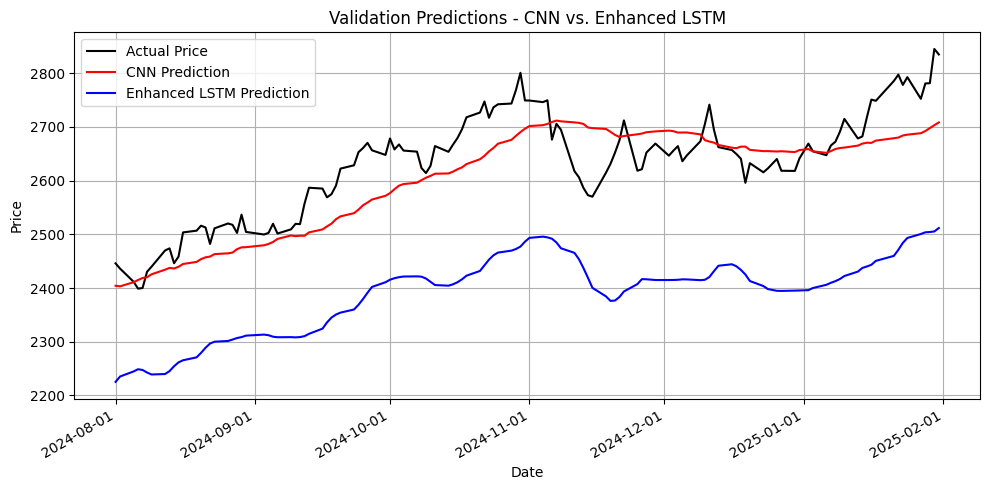

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import os
import random
import warnings
import itertools

# --------------------------------------------------------------------------------
# 1. Reproducibility & Device Setup
# --------------------------------------------------------------------------------
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# --------------------------------------------------------------------------------
# 2. Load & Preprocess Data
# --------------------------------------------------------------------------------
df = pd.read_csv('Gold Futures Historical Data_1Yr.csv')
df.drop(['Vol.', 'Change %'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

num_cols = df.columns.drop('Date')
df[num_cols] = df[num_cols].replace({',': ''}, regex=True)
df[num_cols] = df[num_cols].astype('float64')

# Features we want to use:
features = ['Price', 'Open', 'High', 'Low']
data = df[features].values

# Scale features individually
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Window width for sequences
window_width = 30

X, y, all_dates = [], [], []
for i in range(window_width, len(data_scaled)):
    X.append(data_scaled[i - window_width : i])
    # Target is the next day's Price
    y.append(data_scaled[i, 0])  # 'Price' is index 0
    all_dates.append(df['Date'].iloc[i])

X = np.array(X)
y = np.array(y)
all_dates = np.array(all_dates)
assert len(X) == len(y) == len(all_dates)

# --------------------------------------------------------------------------------
# 3. Train/Validation Split (no test set)
# --------------------------------------------------------------------------------
# Example: training data < 2024-08-01, validation data >= 2024-08-01
train_cutoff = pd.to_datetime('2024-08-01')
train_mask = all_dates < train_cutoff
val_mask   = all_dates >= train_cutoff

X_train, y_train = X[train_mask], y[train_mask]
X_val,   y_val   = X[val_mask],   y[val_mask]
train_dates      = all_dates[train_mask]
val_dates        = all_dates[val_mask]

print(f"Training samples:   {len(X_train)}")
print(f"Validation samples: {len(X_val)}")

# Convert to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float().unsqueeze(1)
X_val_tensor   = torch.from_numpy(X_val).float()
y_val_tensor   = torch.from_numpy(y_val).float().unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset   = TensorDataset(X_val_tensor,   y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
val_loader   = DataLoader(val_dataset,   batch_size=32, shuffle=False)

# --------------------------------------------------------------------------------
# 4. Define Model Architectures
# --------------------------------------------------------------------------------
class CNNModel(nn.Module):
    def __init__(self, in_channels=4, c1=64, c2=128, dropout=0.2, window_size=30):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, c1, kernel_size=3)
        self.conv2 = nn.Conv1d(c1, c2, kernel_size=3)
        self.dropout = nn.Dropout(dropout)
        
        # Output size after two Conv1d layers:
        # Each Conv1d with kernel_size=3 reduces length by (3 - 1) = 2 total across 2 layers
        conv_out_len = window_size - 2*(3 - 1)  # i.e. window_size - 4
        self.fc = nn.Linear(c2 * conv_out_len, 1)

    def forward(self, x):
        # x shape: [batch, seq_len, in_channels]
        # Reorder to: [batch, in_channels, seq_len]
        x = x.permute(0, 2, 1)
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.dropout(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)


class EnhancedLSTM(nn.Module):
    def __init__(self, input_size=4, hidden_size=128, num_layers=3, dropout=0.2):
        super().__init__()
        self.rnn = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout=dropout,
            batch_first=True
        )
        self.dropout = nn.Dropout(dropout)
        self.bn = nn.BatchNorm1d(hidden_size)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # x shape: [batch, seq_len, input_size]
        out, _ = self.rnn(x)  # out: [batch, seq_len, hidden_size]
        out = out[:, -1, :]   # last timestep
        out = self.bn(out)
        out = self.dropout(out)
        out = self.fc(out)
        return out


class SimpleRNN(nn.Module):
    """ (Optional) Example of an RNN if needed for comparison """
    def __init__(self, input_size=4, hidden_size=64, num_layers=2, dropout=0.1):
        super().__init__()
        self.rnn = nn.RNN(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            nonlinearity='relu',
            dropout=dropout,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = out[:, -1, :]
        out = self.fc(out)
        return out

# --------------------------------------------------------------------------------
# 5. EarlyStopping Utility
# --------------------------------------------------------------------------------
class EarlyStopping:
    def __init__(self, patience=20, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = None
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > (self.best_loss - self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

# --------------------------------------------------------------------------------
# 6. Inverse Transform for Price
# --------------------------------------------------------------------------------
def inverse_transform(y_scaled):
    """
    Revert scaled 'Price' to original scale.
    """
    y_scaled = np.array(y_scaled).reshape(-1,1)
    # Fill dummy zeros for the other 3 features
    zeros = np.zeros((y_scaled.shape[0], len(features)-1))
    combined = np.hstack((y_scaled, zeros))
    y_inv = scaler.inverse_transform(combined)
    return y_inv[:, 0]

# --------------------------------------------------------------------------------
# 7. Single Training Loop Function
# --------------------------------------------------------------------------------
def train_one_model(model, 
                    train_loader, 
                    val_loader, 
                    lr=1e-4, 
                    max_epochs=100, 
                    patience=20):
    criterion = nn.HuberLoss()
    optimizer = optim.AdamW(model.parameters(), lr=lr)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=patience)

    early_stopper = EarlyStopping(patience=patience)

    best_val_loss = float('inf')
    train_losses, val_losses = [], []

    for epoch in range(max_epochs):
        # --- TRAIN ---
        model.train()
        batch_train_losses = []
        for Xb, yb in train_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            optimizer.zero_grad()
            preds = model(Xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()
            batch_train_losses.append(loss.item())
        avg_train_loss = np.mean(batch_train_losses)
        train_losses.append(avg_train_loss)

        # --- VALIDATE ---
        model.eval()
        batch_val_losses = []
        with torch.no_grad():
            for Xb, yb in val_loader:
                Xb, yb = Xb.to(device), yb.to(device)
                preds = model(Xb)
                val_loss = criterion(preds, yb)
                batch_val_losses.append(val_loss.item())
        avg_val_loss = np.mean(batch_val_losses)
        val_losses.append(avg_val_loss)

        # Step the scheduler
        scheduler.step(avg_val_loss)

        # Early stopping
        early_stopper(avg_val_loss)
        if early_stopper.early_stop:
            # print(f"Early stopping at epoch {epoch+1}")
            break

        # Track best model state
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_model_state = model.state_dict()

    # After training, restore best model weights
    model.load_state_dict(best_model_state)
    return model, train_losses, val_losses, best_val_loss

# --------------------------------------------------------------------------------
# 8. Hyperparameter Search for CNN & Enhanced LSTM
# --------------------------------------------------------------------------------
# We’ll do small grids. Feel free to expand them.
cnn_params = {
    'lr': [1e-4, 5e-5],
    'c1': [32, 64],
    'c2': [64, 128],
    'dropout': [0.1, 0.2]
}
lstm_params = {
    'lr': [1e-4, 5e-5],
    'hidden_size': [64, 128],
    'dropout': [0.1, 0.2]
}

def param_search_cnn():
    best_loss = float('inf')
    best_config = None
    best_model_obj = None
    
    # Iterate all combinations
    keys = list(cnn_params.keys())  # ['lr','c1','c2','dropout']
    for vals in itertools.product(*(cnn_params[k] for k in keys)):
        combo = dict(zip(keys, vals))
        lr = combo['lr']
        c1 = combo['c1']
        c2 = combo['c2']
        drop = combo['dropout']

        model = CNNModel(in_channels=len(features), c1=c1, c2=c2, dropout=drop, window_size=window_width).to(device)
        
        model, tr_losses, va_losses, va_loss = train_one_model(
            model, train_loader, val_loader, 
            lr=lr, max_epochs=150, patience=20
        )
        
        if va_loss < best_loss:
            best_loss = va_loss
            best_config = (lr, c1, c2, drop)
            best_model_obj = model

        print(f"[CNN] Tried LR={lr}, c1={c1}, c2={c2}, drop={drop} | ValLoss={va_loss:.6f}")

    print("\n--- Best CNN Config ---")
    print(f"Val Loss={best_loss:.6f}")
    print(f"LR={best_config[0]}, c1={best_config[1]}, c2={best_config[2]}, dropout={best_config[3]}\n")
    return best_model_obj

def param_search_enhanced_lstm():
    best_loss = float('inf')
    best_config = None
    best_model_obj = None

    keys = list(lstm_params.keys())  # ['lr','hidden_size','dropout']
    for vals in itertools.product(*(lstm_params[k] for k in keys)):
        combo = dict(zip(keys, vals))
        lr = combo['lr']
        hs = combo['hidden_size']
        drop = combo['dropout']

        # Construct Enhanced LSTM
        model = EnhancedLSTM(
            input_size=len(features),
            hidden_size=hs,
            num_layers=3,
            dropout=drop
        ).to(device)

        model, tr_losses, va_losses, va_loss = train_one_model(
            model, train_loader, val_loader,
            lr=lr, max_epochs=150, patience=20
        )

        if va_loss < best_loss:
            best_loss = va_loss
            best_config = (lr, hs, drop)
            best_model_obj = model

        print(f"[Enhanced LSTM] Tried LR={lr}, hidden={hs}, drop={drop} | ValLoss={va_loss:.6f}")

    print("\n--- Best Enhanced LSTM Config ---")
    print(f"Val Loss={best_loss:.6f}")
    print(f"LR={best_config[0]}, hidden={best_config[1]}, dropout={best_config[2]}\n")
    return best_model_obj

# --------------------------------------------------------------------------------
# 9. Run the Parameter Searches
# --------------------------------------------------------------------------------
print("====== Searching hyperparams for CNN ======")
best_cnn_model = param_search_cnn()

print("====== Searching hyperparams for Enhanced LSTM ======")
best_lstm_model = param_search_enhanced_lstm()

# (Optional) We could similarly create a param dict for RNN or GRU
# and do param_search_rnn() or param_search_gru() in the same style.

# --------------------------------------------------------------------------------
# 10. Evaluate Final (Best) Models on Validation
# --------------------------------------------------------------------------------
def evaluate_on_validation(model, X_val_tensor, y_val_tensor):
    """
    Returns predicted vs. actual, plus MAPE.
    """
    model.eval()
    preds_list = []
    with torch.no_grad():
        val_data = DataLoader(TensorDataset(X_val_tensor, y_val_tensor), batch_size=32, shuffle=False)
        for Xb, _ in val_data:
            Xb = Xb.to(device)
            out = model(Xb)
            preds_list.append(out.cpu().numpy())
    all_preds = np.concatenate(preds_list, axis=0).ravel()
    # Invert scale
    preds_inv = inverse_transform(all_preds)
    actual_inv = inverse_transform(y_val_tensor.numpy())
    mape_val = mean_absolute_percentage_error(actual_inv, preds_inv)*100
    return preds_inv, actual_inv, mape_val

# Evaluate CNN
cnn_preds, cnn_actual, cnn_mape = evaluate_on_validation(best_cnn_model, X_val_tensor, y_val_tensor)
print(f"Best CNN Validation MAPE: {cnn_mape:.2f}%")

# Evaluate Enhanced LSTM
lstm_preds, lstm_actual, lstm_mape = evaluate_on_validation(best_lstm_model, X_val_tensor, y_val_tensor)
print(f"Best Enhanced LSTM Validation MAPE: {lstm_mape:.2f}%")

# --------------------------------------------------------------------------------
# 11. Plot Results (Validation)
# --------------------------------------------------------------------------------
import matplotlib.dates as mdates

plt.figure(figsize=(10,5))
plt.plot(val_dates, cnn_actual, label='Actual Price', color='black')
plt.plot(val_dates, cnn_preds,  label='CNN Prediction', color='red')
plt.plot(val_dates, lstm_preds, label='Enhanced LSTM Prediction', color='blue')

plt.title('Validation Predictions - CNN vs. Enhanced LSTM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Format dates on x-axis
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()



=== LSTM ===
LSTM | Epoch 100 | Train Loss: 0.000554 | Val Loss: 0.000818
LSTM | Epoch 200 | Train Loss: 0.000576 | Val Loss: 0.000801
LSTM | Epoch 300 | Train Loss: 0.000340 | Val Loss: 0.000599
LSTM | Epoch 400 | Train Loss: 0.000559 | Val Loss: 0.000828
Early stopping triggered.
LSTM stopped early at epoch 412

=== GRU ===


/tmp/ipykernel_986011/1389730825.py:262: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_path, map_location=device))


GRU | Epoch 100 | Train Loss: 0.000392 | Val Loss: 0.000570
GRU | Epoch 200 | Train Loss: 0.000445 | Val Loss: 0.000588
GRU | Epoch 300 | Train Loss: 0.000503 | Val Loss: 0.000564
Early stopping triggered.
GRU stopped early at epoch 338

=== RNN ===


/tmp/ipykernel_986011/1389730825.py:262: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_path, map_location=device))


RNN | Epoch 100 | Train Loss: 0.000369 | Val Loss: 0.000758
RNN | Epoch 200 | Train Loss: 0.000394 | Val Loss: 0.001226
RNN | Epoch 300 | Train Loss: 0.000337 | Val Loss: 0.001046
Early stopping triggered.
RNN stopped early at epoch 385

=== EnhancedLSTM ===


/tmp/ipykernel_986011/1389730825.py:262: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_path, map_location=device))


EnhancedLSTM | Epoch 100 | Train Loss: 0.000920 | Val Loss: 0.001266
EnhancedLSTM | Epoch 200 | Train Loss: 0.002745 | Val Loss: 0.004564
EnhancedLSTM | Epoch 300 | Train Loss: 0.000457 | Val Loss: 0.001084
Early stopping triggered.
EnhancedLSTM stopped early at epoch 349


/tmp/ipykernel_986011/1389730825.py:262: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_path, map_location=device))


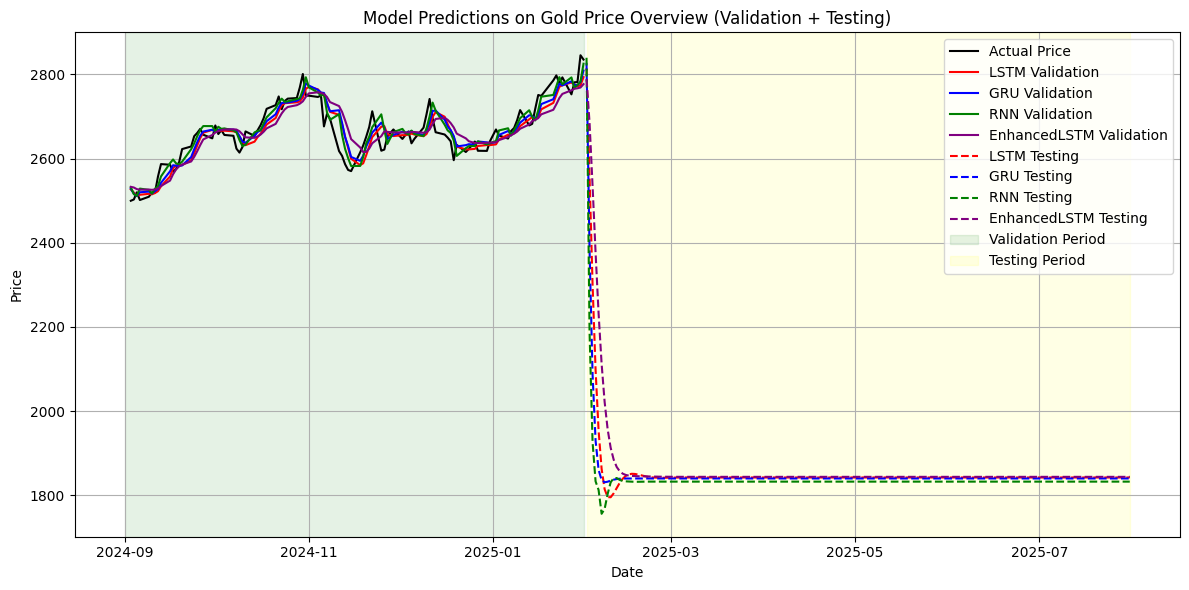

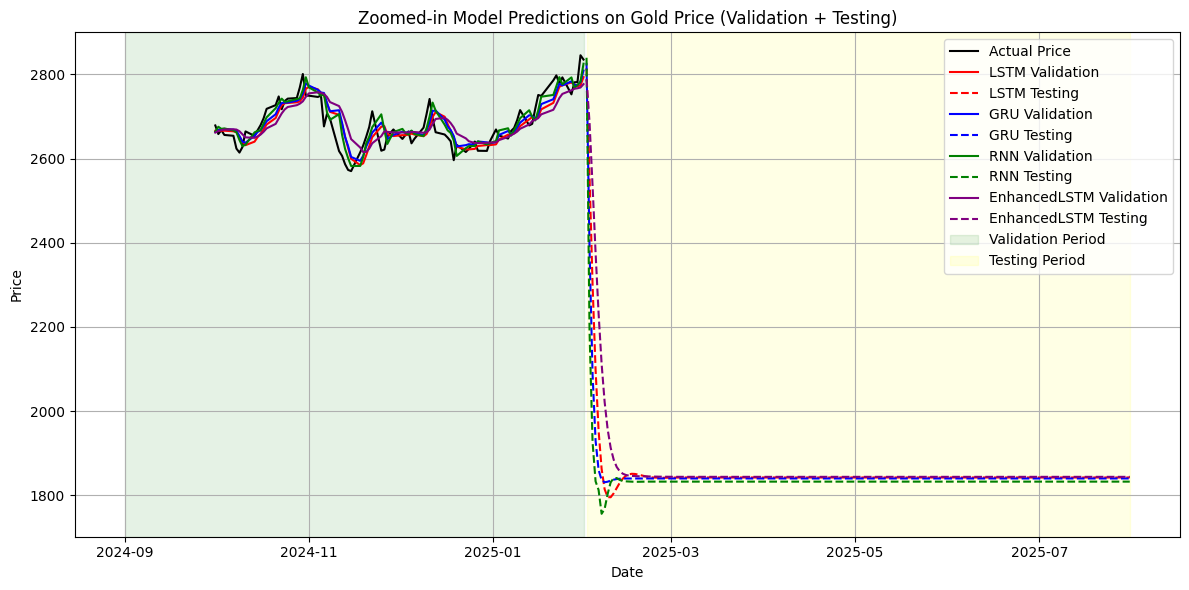

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import os
import random
import warnings

# -----------------------
# Reproducibility
# -----------------------
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# -----------------------
# 1) Load & Preprocess Data
# -----------------------
df = pd.read_csv('Gold Futures Historical Data_1Yr.csv')  # Adjust filename as needed
df.drop(['Vol.', 'Change %'], axis=1, errors='ignore', inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)
df.reset_index(drop=True, inplace=True)

# Convert numeric columns safely
num_cols = df.columns.drop('Date')
df[num_cols] = df[num_cols].replace({',': ''}, regex=True).astype(float)

# Filter only the date range needed, e.g., from 2023-08-31 to 2025-07-31
start_date = pd.to_datetime('2023-08-31')
end_date = pd.to_datetime('2025-07-31')
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].copy()
df.reset_index(drop=True, inplace=True)

# Ensure no duplicates or nulls
assert df.duplicated().sum() == 0, "Duplicates found!"
assert df.isnull().sum().sum() == 0, "Missing values found!"

# Select features (first column is our target Price)
features = ['Price', 'Open', 'High', 'Low']
data = df[features].values
dates = df['Date'].values

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# -----------------------
# 2) Create Sliding Window Sequences
# -----------------------
window_width = 30

X_all, y_all, date_all = [], [], []
for i in range(window_width, len(data_scaled)):
    X_all.append(data_scaled[i - window_width:i])
    y_all.append(data_scaled[i, 0])  # 0 -> scaled 'Price'
    date_all.append(dates[i])

X_all = np.array(X_all)
y_all = np.array(y_all)
date_all = np.array(date_all)

# -----------------------
# 3) Split into Train & Validation
#    - Train:   2023-08-31 ~ 2024-08-31
#    - Valid.:  2024-09-01 ~ 2025-01-31
#    - Test:    2025-02-01 ~ 2025-07-31 (pure future, no real price)
# -----------------------
train_cutoff = pd.to_datetime('2024-09-01')  # train up to 2024-08-31
val_cutoff   = pd.to_datetime('2025-02-01')  # validate up to 2025-01-31

train_mask = date_all < train_cutoff
val_mask   = (date_all >= train_cutoff) & (date_all < val_cutoff)

X_train = X_all[train_mask]
y_train = y_all[train_mask]
train_dates = date_all[train_mask]

X_val = X_all[val_mask]
y_val = y_all[val_mask]
val_dates = date_all[val_mask]

# Convert to PyTorch
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1)
X_val_t   = torch.tensor(X_val,   dtype=torch.float32)
y_val_t   = torch.tensor(y_val,   dtype=torch.float32).unsqueeze(-1)

train_dataset = TensorDataset(X_train_t, y_train_t)
val_dataset   = TensorDataset(X_val_t,   y_val_t)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False)

# -----------------------
# 4) Define Models (CNN Removed)
# -----------------------
class BaseModel(nn.Module):
    def __init__(self, model_type='LSTM'):
        super().__init__()
        self.model_type = model_type
        
        if model_type == 'LSTM':
            self.rnn = nn.LSTM(
                input_size=len(features),
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                dropout=0.1
            )
            self.fc = nn.Linear(128, 1)

        elif model_type == 'GRU':
            self.rnn = nn.GRU(
                input_size=len(features),
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                dropout=0.1
            )
            self.fc = nn.Linear(128, 1)

        elif model_type == 'RNN':
            self.rnn = nn.RNN(
                input_size=len(features),
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                nonlinearity='tanh',
                dropout=0.1
            )
            self.fc = nn.Linear(128, 1)

        elif model_type == 'EnhancedLSTM':
            # Slightly deeper LSTM
            self.rnn = nn.LSTM(
                input_size=len(features),
                hidden_size=128,
                num_layers=3,
                batch_first=True,
                dropout=0.1
            )
            self.dropout = nn.Dropout(0.1)
            self.fc = nn.Linear(128, 1)
        else:
            raise ValueError("model_type must be one of LSTM, GRU, RNN, EnhancedLSTM.")

    def forward(self, x):
        if self.model_type == 'EnhancedLSTM':
            out, _ = self.rnn(x)
            out = out[:, -1, :]
            out = self.dropout(out)
            return self.fc(out)
        else:
            out, _ = self.rnn(x)
            out = out[:, -1, :]
            return self.fc(out)

# -----------------------
# Early Stopping
# -----------------------
class EarlyStopping:
    def __init__(self, patience=100, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > (self.best_loss - self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                print("Early stopping triggered.")
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

# -----------------------
# Utility: inverse_transform for Price
# -----------------------
def inverse_transform(y_scaled):
    """
    Inverse the MinMaxScaler for the 'Price' column only,
    setting other features to zero before inverse scaling.
    """
    y_scaled = np.array(y_scaled).reshape(-1, 1)
    zeros = np.zeros((y_scaled.shape[0], len(features) - 1))
    y_combined = np.hstack((y_scaled, zeros))
    y_inv = scaler.inverse_transform(y_combined)
    return y_inv[:, 0]

# -----------------------
# 5) Train & Validate (Best Param Selection)
# -----------------------
def train_and_validate(model_type='LSTM'):
    model = BaseModel(model_type).to(device)
    criterion = nn.HuberLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.0005)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=100)
    early_stopper = EarlyStopping(patience=100)

    best_val_loss = float('inf')
    best_path = f'best_{model_type}_params.pth'

    num_epochs = 1000
    for epoch in range(num_epochs):
        # --- train ---
        model.train()
        train_losses = []
        for Xb, yb in train_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            optimizer.zero_grad()
            preds = model(Xb)
            loss = criterion(preds, yb)
            loss.backward()
            # gradient clip if needed
            optimizer.step()
            train_losses.append(loss.item())
        avg_train_loss = np.mean(train_losses)

        # --- validate ---
        model.eval()
        val_losses = []
        with torch.no_grad():
            for Xb, yb in val_loader:
                Xb, yb = Xb.to(device), yb.to(device)
                preds = model(Xb)
                val_loss = criterion(preds, yb)
                val_losses.append(val_loss.item())
        avg_val_loss = np.mean(val_losses)

        # lr scheduler, early stopping
        scheduler.step(avg_val_loss)
        early_stopper(avg_val_loss)

        # Save best weights
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), best_path)

        if early_stopper.early_stop:
            print(f"{model_type} stopped early at epoch {epoch+1}")
            break

        if (epoch+1) % 100 == 0:
            print(f"{model_type} | Epoch {epoch+1} | Train Loss: {avg_train_loss:.6f} | Val Loss: {avg_val_loss:.6f}")

    # Load best weights
    model.load_state_dict(torch.load(best_path, map_location=device))

    # Final validation predictions
    model.eval()
    val_preds_list = []
    with torch.no_grad():
        for Xb, _ in val_loader:
            Xb = Xb.to(device)
            val_preds_list.append(model(Xb).cpu().numpy())
    val_preds = np.concatenate(val_preds_list, axis=0)
    val_preds_inv = inverse_transform(val_preds)
    
    return model, val_preds_inv

# -----------------------
# 6) Final Testing: Use Training+Validation range as input
#    to generate predictions from 2025-02-01 to 2025-07-31
# -----------------------
def predict_future(model):
    """
    Rebuild one large window from the entire range up to 2025-01-31,
    then do iterative predictions from 2025-02-01 to 2025-07-31.
    """
    # 6.1) Identify all rows up to 2025-01-31
    combined_cutoff = pd.to_datetime('2025-02-01')
    combined_mask = df['Date'] < combined_cutoff
    combined_data = data_scaled[combined_mask]  # everything up to 2025-01-31
    combined_dates = df['Date'][combined_mask].values

    # We'll do an iterative forecast from the last 30 days within that combined set.
    if len(combined_data) < window_width:
        raise ValueError("Not enough data to form a 30-day window!")
    
    # last 30 rows from combined_data
    last_window = combined_data[-window_width:]
    
    # 6.2) We'll predict from 2025-02-01 to 2025-07-31
    future_start = pd.to_datetime('2025-02-01')
    future_end   = pd.to_datetime('2025-07-31')
    future_dates = pd.date_range(start=future_start, end=future_end, freq='D')
    num_future_steps = len(future_dates)

    future_preds_scaled = []
    model.eval()
    with torch.no_grad():
        current_window = last_window.copy()
        for _ in range(num_future_steps):
            inp = torch.tensor(current_window[None, ...], dtype=torch.float32, device=device)
            out = model(inp)  # shape [1,1]
            pred_val = out.item()
            future_preds_scaled.append(pred_val)

            # roll forward
            new_row = np.zeros((1, len(features)))
            new_row[0, 0] = pred_val  # put the predicted Price in
            current_window = np.vstack((current_window[1:], new_row))

    # Inverse transform
    future_preds_inv = inverse_transform(future_preds_scaled)
    return future_dates, future_preds_inv

# -----------------------
# 7) Run for Each Model & Plot
# -----------------------
model_types = ['LSTM','GRU','RNN','EnhancedLSTM']
model_colors = {
    'LSTM': 'red',
    'GRU': 'blue',
    'RNN': 'green',
    'EnhancedLSTM': 'purple'
}

all_results = {}
for mtype in model_types:
    print(f"\n=== {mtype} ===")
    best_model, val_preds_inv = train_and_validate(mtype)

    # Store validation predictions
    all_results[mtype] = {
        'model': best_model,
        'val_preds_inv': val_preds_inv
    }

# Now generate future (testing) predictions using best parameters
for mtype in model_types:
    model = all_results[mtype]['model']
    future_dates, future_preds_inv = predict_future(model)
    all_results[mtype]['future_dates'] = future_dates
    all_results[mtype]['future_preds_inv'] = future_preds_inv

# -----------------------
# 8) Plot: "Overview (Validation + Testing)"
# -----------------------
plt.figure(figsize=(12, 6))

# For an overview, let's plot from the start of validation (2024-09-01) to the end of testing (2025-07-31).
val_plot_start = pd.to_datetime('2024-09-01')
val_plot_mask = (df['Date'] >= val_plot_start) & (df['Date'] <= pd.to_datetime('2025-07-31'))

# Plot the actual Price for that date range (if available). 
# For 2025-02-01 onward, presumably we won't have real data (but you can show the extension as blank or simply not plot).
actual_dates = df['Date'][val_plot_mask]
actual_prices = df['Price'][val_plot_mask]

plt.plot(actual_dates, actual_prices, color='black', label='Actual Price')

# Plot each model's predictions in validation window
for mtype in model_types:
    val_mask_indexes = (val_dates >= val_plot_start) & (val_dates <= pd.to_datetime('2025-01-31'))
    # Align predicted points to the same indexes
    pred_val_subset = all_results[mtype]['val_preds_inv'][val_mask_indexes]
    date_val_subset = val_dates[val_mask_indexes]

    plt.plot(date_val_subset, pred_val_subset,
             color=model_colors[mtype],
             linestyle='-',
             label=f'{mtype} Validation')

# Plot each model's future predictions
for mtype in model_types:
    future_dates  = all_results[mtype]['future_dates']
    future_values = all_results[mtype]['future_preds_inv']
    plt.plot(future_dates, future_values,
             color=model_colors[mtype],
             linestyle='--',
             label=f'{mtype} Testing')

plt.axvspan(pd.to_datetime('2024-09-01'), pd.to_datetime('2025-01-31'),
            color='green', alpha=0.1, label='Validation Period')
plt.axvspan(pd.to_datetime('2025-02-01'), pd.to_datetime('2025-07-31'),
            color='yellow', alpha=0.1, label='Testing Period')

plt.title("Model Predictions on Gold Price Overview (Validation + Testing)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------
# 9) Plot: "Zoomed-in" (Validation + Testing)
#    You can choose narrower date boundaries here
# -----------------------
plt.figure(figsize=(12, 6))

# For example, zoom in around part of the validation + test overlap
zoom_start = pd.to_datetime('2024-10-01')
zoom_end   = pd.to_datetime('2025-07-31')
zoom_mask = (df['Date'] >= zoom_start) & (df['Date'] <= zoom_end)
actual_zoom_dates = df['Date'][zoom_mask]
actual_zoom_prices = df['Price'][zoom_mask]

plt.plot(actual_zoom_dates, actual_zoom_prices, color='black', label='Actual Price')

# Plot model predictions in the zoomed range
for mtype in model_types:
    # validation portion
    val_mask_indexes = (val_dates >= zoom_start) & (val_dates <= pd.to_datetime('2025-01-31'))
    zoom_val_preds = all_results[mtype]['val_preds_inv'][val_mask_indexes]
    zoom_val_dates = val_dates[val_mask_indexes]

    plt.plot(zoom_val_dates, zoom_val_preds,
             color=model_colors[mtype],
             linestyle='-',
             label=f'{mtype} Validation')

    # future portion
    fut_mask = (all_results[mtype]['future_dates'] >= zoom_start) & \
               (all_results[mtype]['future_dates'] <= zoom_end)
    zoom_fut_preds = all_results[mtype]['future_preds_inv'][fut_mask]
    zoom_fut_dates = all_results[mtype]['future_dates'][fut_mask]

    plt.plot(zoom_fut_dates, zoom_fut_preds,
             color=model_colors[mtype],
             linestyle='--',
             label=f'{mtype} Testing')

plt.axvspan(pd.to_datetime('2024-09-01'), pd.to_datetime('2025-01-31'),
            color='green', alpha=0.1, label='Validation Period')
plt.axvspan(pd.to_datetime('2025-02-01'), pd.to_datetime('2025-07-31'),
            color='yellow', alpha=0.1, label='Testing Period')

plt.title("Zoomed-in Model Predictions on Gold Price (Validation + Testing)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Training LSTM model...
[LSTM] Epoch 100/800, Training Loss: 0.000597, Validation Loss: 0.001326
Early stopping triggered
[LSTM] Early stopping at epoch 192
[LSTM] Test Loss: 0.000730
[LSTM] Test MAPE: 91081670656000.00%
[LSTM] Test Accuracy: -91081670655900.00%

Training GRU model...
[GRU] Epoch 100/800, Training Loss: 0.000911, Validation Loss: 0.000929
[GRU] Epoch 200/800, Training Loss: 0.000281, Validation Loss: 0.000393
[GRU] Epoch 300/800, Training Loss: 0.000280, Validation Loss: 0.000564
Early stopping triggered
[GRU] Early stopping at epoch 384
[GRU] Test Loss: 0.000322
[GRU] Test MAPE: 2437927321600.00%
[GRU] Test Accuracy: -2437927321500.00%

Training RNN model...
[RNN] Epoch 100/800, Training Loss: 0.000498, Validation Loss: 0.004027
Early stopping triggered
[RNN] Early stopping at epoch 160
[RNN] Test Loss: 0.002886
[RNN] Test MAPE: 161539673292800.00%
[RNN] Test Accuracy: -161539673292700.00%

Training CNN model...
[CNN] Epoch 100/800, Training Loss: 0.000394, Validation

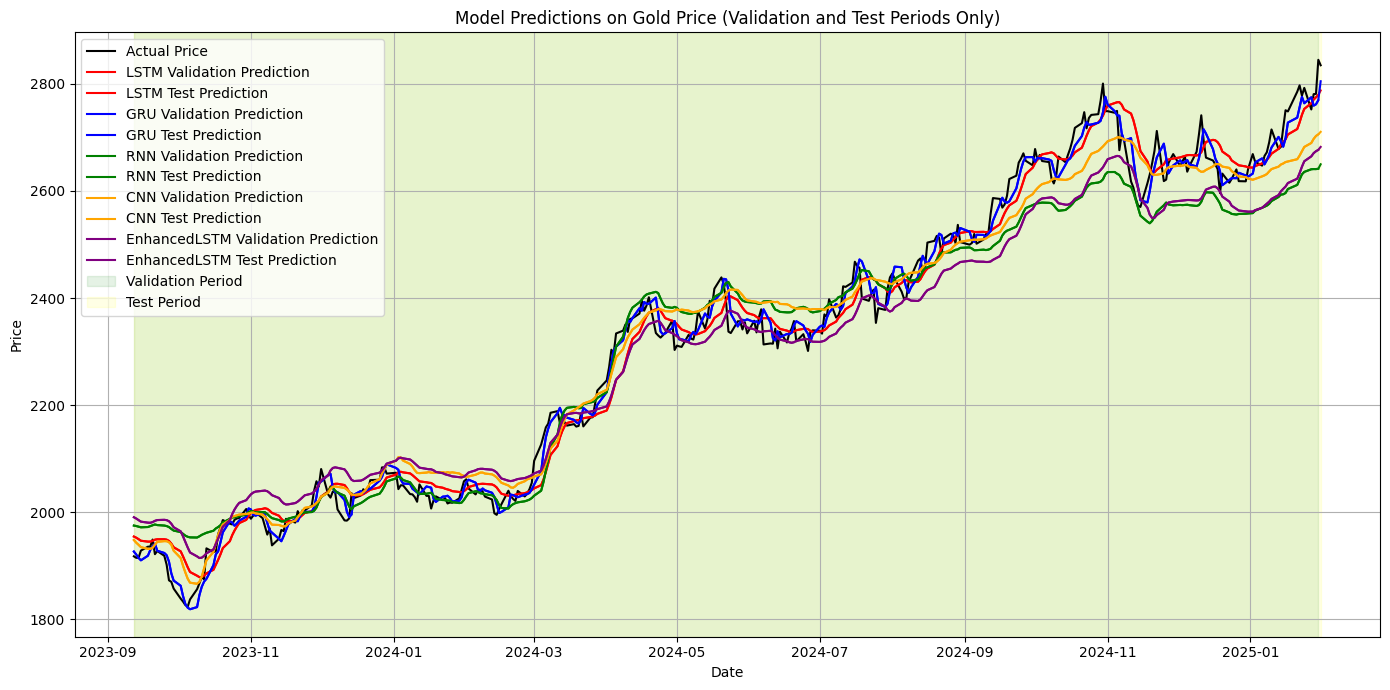

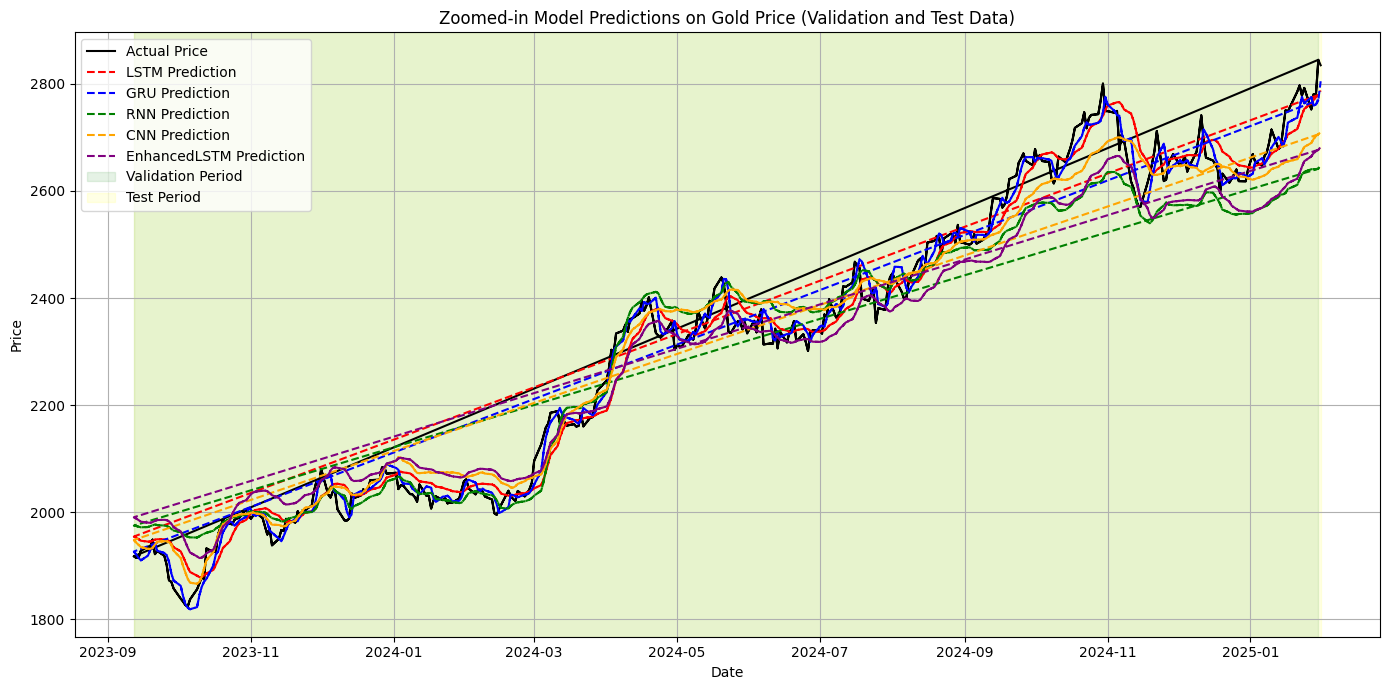

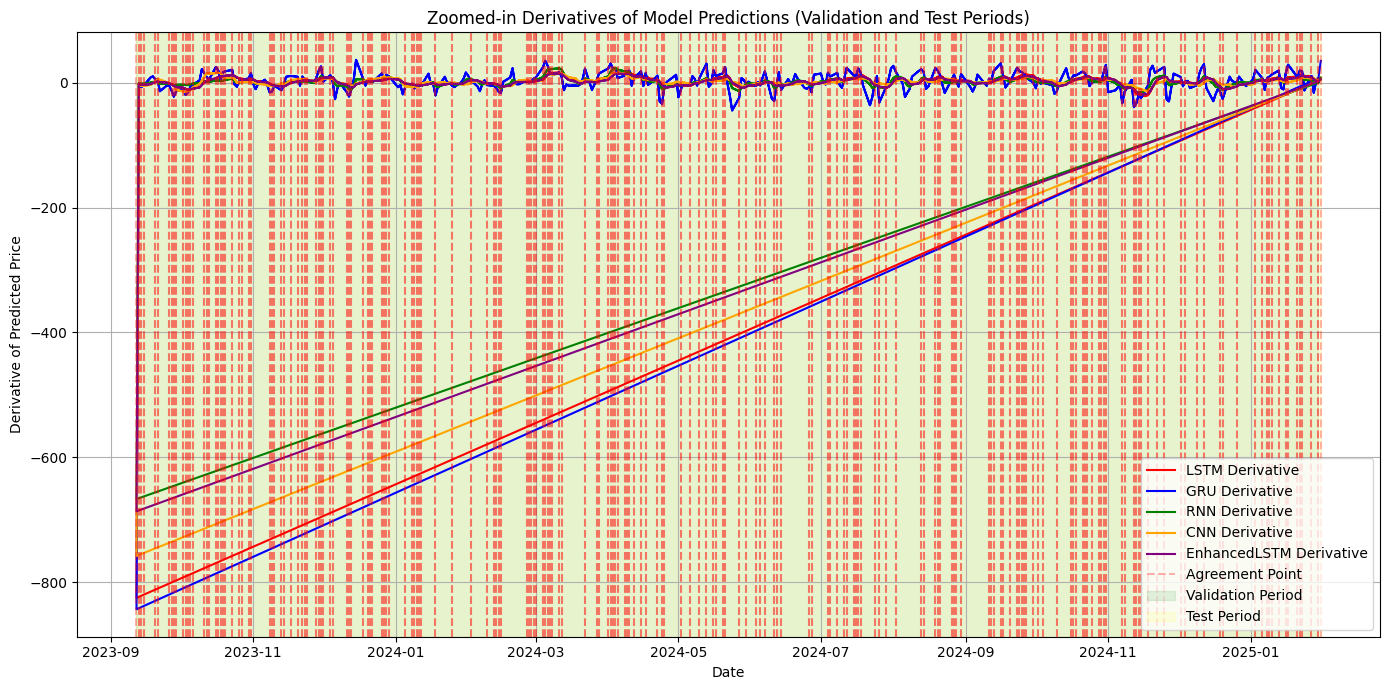

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F  # Ensure F is imported for activation functions
from torch.utils.data import DataLoader, TensorDataset
import os
import random
import warnings
import matplotlib.dates as mdates

# Set random seeds for reproducibility
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)

# Load and prepare data
df = pd.read_csv('Gold Futures Historical Data_1Yr.csv')
df.drop(['Vol.', 'Change %'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

# Transform columns to numerical format
num_cols = df.columns.drop(['Date'])
df[num_cols] = df[num_cols].replace({',': ''}, regex=True)
df[num_cols] = df[num_cols].astype('float64')

# Check for duplicates and nulls
assert df.duplicated().sum() == 0, "Duplicate rows found!"
assert df.isnull().sum().sum() == 0, "Missing values found!"

# Features to include
features = ['Price', 'Open', 'High', 'Low']
data = df[features].values

# Data scaling (scale each feature individually)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Window width
window_width = 30  # Adjusted window width for experimentation

# Prepare sequences and corresponding dates
X, y, dates = [], [], []
for i in range(window_width, len(data_scaled)):
    X.append(data_scaled[i - window_width:i])
    y.append(data_scaled[i, 0])  # Assuming 'Price' is the target
    dates.append(df['Date'].iloc[i])

X = np.array(X)
y = np.array(y)
dates = np.array(dates)

# Ensure that dates and y have the same length
assert len(dates) == len(y), "Mismatch between dates and y lengths"

# Split the data into training, validation, and test sets based on dates
train_mask = dates < pd.to_datetime('2024-08-01')
val_mask = (dates >= pd.to_datetime('2018-08-01')) & (dates < pd.to_datetime('2025-01-31'))
test_mask = (dates >= pd.to_datetime('2018-01-31')) & (dates < pd.to_datetime('2025-07-31'))


X_train, y_train = X[train_mask], y[train_mask]
X_val, y_val = X[val_mask], y[val_mask]
X_test, y_test = X[test_mask], y[test_mask]

train_dates = dates[train_mask]
val_dates = dates[val_mask]
test_dates = dates[test_mask]

# Convert to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float().unsqueeze(1)
X_val_tensor = torch.from_numpy(X_val).float()
y_val_tensor = torch.from_numpy(y_val).float().unsqueeze(1)
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float().unsqueeze(1)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
batch_size = 32  # Adjusted batch size
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)  # Set shuffle=False for sequential data
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


### All the above are the data cleaning and preparation steps ### 


# Define the models
class BaseModel(nn.Module):
    def __init__(self, model_type='LSTM'):
        super(BaseModel, self).__init__()
        self.model_type = model_type
        if model_type == 'LSTM':
            self.rnn = nn.LSTM(
                input_size=len(features),
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                dropout=0.1,
            )
            self.fc = nn.Linear(128, 1)
        elif model_type == 'GRU':
            self.rnn = nn.GRU(
                input_size=len(features),
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                dropout=0.1,
            )
            self.fc = nn.Linear(128, 1)
        elif model_type == 'RNN':
            self.rnn = nn.RNN(
                input_size=len(features),
                hidden_size=128,
                num_layers=2,
                batch_first=True,
                nonlinearity='relu',
                dropout=0.1,
            )
            self.fc = nn.Linear(128, 1)
        elif model_type == 'CNN':
            self.conv1 = nn.Conv1d(in_channels=len(features), out_channels=64, kernel_size=3)
            self.conv2 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3)
            # Calculate the output size after Conv1d layers
            # Each Conv1d layer reduces the sequence length by (kernel_size - 1)
            conv_output_length = window_width - 2 * (3 - 1)  # Two Conv1d layers with kernel_size=3
            self.fc = nn.Linear(128 * conv_output_length, 1)
        elif model_type == 'EnhancedLSTM':
            self.rnn = nn.LSTM(
                input_size=len(features),
                hidden_size=128,
                num_layers=3,
                batch_first=True,
                dropout=0.2,
            )
            self.dropout = nn.Dropout(0.2)
            self.bn = nn.BatchNorm1d(128)
            self.fc = nn.Linear(128, 1)
        else:
            raise ValueError("Invalid model_type. Choose 'LSTM', 'GRU', 'RNN', 'CNN', or 'EnhancedLSTM'.")

    def forward(self, x):
        if self.model_type == 'CNN':
            x = x.permute(0, 2, 1)  # Reshape for Conv1d: (batch_size, channels, seq_length)
            x = F.relu(self.conv1(x))
            x = F.relu(self.conv2(x))
            x = x.view(x.size(0), -1)
            out = self.fc(x)
        elif self.model_type == 'EnhancedLSTM':
            out, _ = self.rnn(x)
            out = out[:, -1, :]
            out = self.bn(out)
            out = self.dropout(out)
            out = self.fc(out)
        else:
            out, _ = self.rnn(x)
            out = out[:, -1, :]
            out = self.fc(out)
        return out

# Early stopping class
class EarlyStopping:
    def __init__(self, patience=150, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
            
    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                print("Early stopping triggered")
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

# Define the inverse_transform function globally
def inverse_transform(y_scaled):
    """
    Inverse transform the scaled 'Price' values back to the original scale.
    Assumes that the scaler was fit on all features.
    """
    y_scaled = np.array(y_scaled).reshape(-1, 1)
    # Create a placeholder for other features with zeros
    zeros = np.zeros((y_scaled.shape[0], len(features) - 1))
    y_combined = np.hstack((y_scaled, zeros))
    y_inv = scaler.inverse_transform(y_combined)
    return y_inv[:, 0]

# Function to train and evaluate a model
def train_and_evaluate(model_name):
    # Initialize the model
    model = BaseModel(model_type=model_name).to(device)
    
    # Define the criterion, optimizer, and scheduler
    criterion = nn.HuberLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.0005)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=150)
    
    # Early stopping
    early_stopping = EarlyStopping(patience=150, min_delta=0)
    num_epochs = 800
    best_val_loss = float('inf')
    
    # Lists to store loss history
    train_losses_per_epoch = []
    val_losses_per_epoch = []
    
    # Path to save the best model checkpoint
    best_model_path = f'best_model_{model_name}.pt'
    
    # Check if a saved model exists and load it
    if os.path.exists(best_model_path):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            model.load_state_dict(torch.load(best_model_path, map_location=device))
        print(f"Loaded existing model for {model_name} from {best_model_path}")
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_losses = []
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            output = model(X_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())
        avg_train_loss = np.mean(train_losses)
        train_losses_per_epoch.append(avg_train_loss)
        
        # Validation phase
        model.eval()
        val_losses = []
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                val_output = model(X_batch)
                val_loss = criterion(val_output, y_batch)
                val_losses.append(val_loss.item())
        avg_val_loss = np.mean(val_losses)
        val_losses_per_epoch.append(avg_val_loss)
        
        # Scheduler step
        scheduler.step(avg_val_loss)
        
        # Check for early stopping
        early_stopping(avg_val_loss)
        if early_stopping.early_stop:
            print(f"[{model_name}] Early stopping at epoch {epoch + 1}")
            break
        
        # Save the best model
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), best_model_path)
        
        # Print losses every 100 epochs
        if (epoch + 1) % 100 == 0:
            print(f'[{model_name}] Epoch {epoch + 1}/{num_epochs}, Training Loss: {avg_train_loss:.6f}, Validation Loss: {avg_val_loss:.6f}')
    
    # Load the best model state
    model.load_state_dict(torch.load(best_model_path, weights_only=True))
    
    # Evaluate on test data
    model.eval()
    test_losses = []
    y_test_pred_list = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            test_losses.append(loss.item())
            y_test_pred_list.append(y_pred.cpu().numpy())
    avg_test_loss = np.mean(test_losses)
    print(f'[{model_name}] Test Loss: {avg_test_loss:.6f}')
    
    # Concatenate test predictions
    y_test_pred_array = np.concatenate(y_test_pred_list, axis=0)
    
    # Calculate MAPE and accuracy
    mape = mean_absolute_percentage_error(y_test_tensor.numpy(), y_test_pred_array)
    accuracy = 100 - mape * 100
    print(f'[{model_name}] Test MAPE: {mape * 100:.2f}%')
    print(f'[{model_name}] Test Accuracy: {accuracy:.2f}%')
    
    # Collect predictions over validation and test sets
    y_val_pred = []
    with torch.no_grad():
        for X_batch, _ in val_loader:
            X_batch = X_batch.to(device)
            y_pred_batch = model(X_batch)
            y_val_pred.append(y_pred_batch.cpu().numpy())
    y_val_pred = np.concatenate(y_val_pred, axis=0)
    
    y_test_pred = y_test_pred_array
    
    # Inverse scaling
    y_val_pred_inv = inverse_transform(y_val_pred)
    y_test_pred_inv = inverse_transform(y_test_pred)
    
    # Store results
    results = {
        'model_name': model_name,
        'val_dates': val_dates,
        'test_dates': test_dates,
        'y_val_pred_inv': y_val_pred_inv,
        'y_test_pred_inv': y_test_pred_inv,
        'train_losses_per_epoch': train_losses_per_epoch,
        'val_losses_per_epoch': val_losses_per_epoch,
    }
    
    return results

# List of models to train
model_names = ['LSTM', 'GRU', 'RNN', 'CNN', 'EnhancedLSTM']

# Dictionary to store results
all_results = {}
    
# Train and evaluate each model
for model_name in model_names:
    print(f"\nTraining {model_name} model...")
    results = train_and_evaluate(model_name)
    all_results[model_name] = results

# Inverse transform the actual validation and test target values
y_val_inv = inverse_transform(y_val_tensor.numpy())
y_test_inv = inverse_transform(y_test_tensor.numpy())

# Colors for different models
model_colors = {
    'LSTM': 'red',
    'GRU': 'blue',
    'RNN': 'green',
    'CNN': 'orange',
    'EnhancedLSTM': 'purple',
}

# Plotting the full dataset with predictions over validation and test sets only
plt.figure(figsize=(14, 7))

# Actual Price
plt.plot(dates, inverse_transform(y), color='black', label='Actual Price')

# Plot predicted data for each model over validation and test datasets only
for model_name, results in all_results.items():
    # Plot validation predictions
    plt.plot(
        results['val_dates'],
        results['y_val_pred_inv'],
        color=model_colors[model_name],
        linestyle='-',
        label=f'{model_name} Validation Prediction'
    )
    # Plot test predictions
    plt.plot(
        results['test_dates'],
        results['y_test_pred_inv'],
        color=model_colors[model_name],
        linestyle='-',
        label=f'{model_name} Test Prediction'
    )

# Highlight validation and test periods
plt.axvspan(val_dates.min(), val_dates.max(), color='green', alpha=0.1, label='Validation Period')
plt.axvspan(test_dates.min(), test_dates.max(), color='yellow', alpha=0.1, label='Test Period')

plt.title('Model Predictions on Gold Price (Validation and Test Periods Only)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Zoomed-in plot for validation and test data with dashed lines for models
plt.figure(figsize=(14, 7))

# Combine validation and test dates and actual prices
zoom_dates = np.concatenate((val_dates, test_dates))
zoom_actual = np.concatenate((y_val_inv, y_test_inv))

# Plot actual prices for validation and test periods
plt.plot(
    zoom_dates,
    zoom_actual,
    color='black',
    label='Actual Price'
)

# Plot predicted data for each model during validation and test periods with dashed lines
for model_name, results in all_results.items():
    # Combine validation and test predictions
    y_pred_combined = np.concatenate((results['y_val_pred_inv'], results['y_test_pred_inv']))
    model_dates = np.concatenate((results['val_dates'], results['test_dates']))
    plt.plot(
        model_dates,
        y_pred_combined,
        color=model_colors[model_name],
        linestyle='--',  # Dashed lines
        label=f'{model_name} Prediction'
    )

# Highlight validation and test periods
plt.axvspan(val_dates.min(), val_dates.max(), color='green', alpha=0.1, label='Validation Period')
plt.axvspan(test_dates.min(), test_dates.max(), color='yellow', alpha=0.1, label='Test Period')

plt.title('Zoomed-in Model Predictions on Gold Price (Validation and Test Data)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute derivatives of predictions for validation and test periods
for model_name, results in all_results.items():
    # Combine validation and test predictions
    y_pred_combined = np.concatenate((results['y_val_pred_inv'], results['y_test_pred_inv']))
    model_dates_combined = np.concatenate((results['val_dates'], results['test_dates']))
    
    # Compute the derivative (difference between consecutive predictions)
    y_derivative = np.diff(y_pred_combined)
    
    # Store the derivative and corresponding dates
    results['model_dates_derivative'] = model_dates_combined[1:]  # Dates corresponding to the derivatives
    results['y_derivative'] = y_derivative

# Determine dates where all models agree on the trend (sign of derivative)
# Collect all derivative dates (should be the same for all models)
common_dates = all_results[model_names[0]]['model_dates_derivative']

agreement_flags = []

for i in range(len(common_dates)):
    signs = []
    for model_name in model_names:
        derivative = all_results[model_name]['y_derivative'][i]
        sign = np.sign(derivative)
        signs.append(sign)
    # Check if all signs are the same (i.e., all positive or all negative)
    if all(s == signs[0] for s in signs):
        agreement_flags.append(1)
    else:
        agreement_flags.append(0)

# Dates where all models agree on the trend
agreement_dates = common_dates[np.array(agreement_flags) == 1]

# Plot the derivatives for each model with validation and test periods highlighted (Zoomed-in)
plt.figure(figsize=(14, 7))

# Define the range for the zoomed-in period (validation and test dates)
zoom_start_date = val_dates.min()
zoom_end_date = test_dates.max()

# Plot the derivatives for each model, limited to the validation and test periods
for model_name, results in all_results.items():
    # Extract the derivatives and dates within the zoomed-in period
    mask = (results['model_dates_derivative'] >= zoom_start_date) & (results['model_dates_derivative'] <= zoom_end_date)
    plt.plot(
        results['model_dates_derivative'][mask],
        results['y_derivative'][mask],
        color=model_colors[model_name],
        label=f'{model_name} Derivative'
    )

# Highlight agreement dates within the zoomed-in range
agreement_dates_zoomed = agreement_dates[(agreement_dates >= zoom_start_date) & (agreement_dates <= zoom_end_date)]

for date in agreement_dates_zoomed:
    plt.axvline(x=date, color='red', alpha=0.3, linestyle='--', label='Agreement Point' if 'Agreement Point' not in plt.gca().get_legend_handles_labels()[1] else "")

# Highlight validation and test periods
plt.axvspan(val_dates.min(), val_dates.max(), color='green', alpha=0.1, label='Validation Period')
plt.axvspan(test_dates.min(), test_dates.max(), color='yellow', alpha=0.1, label='Test Period')

plt.title('Zoomed-in Derivatives of Model Predictions (Validation and Test Periods)')
plt.xlabel('Date')
plt.ylabel('Derivative of Predicted Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
